# Load Libraries

In [196]:
rm(list = ls()) # Clear the environment

library(dplyr)
library(caret)
library(lattice)
library(ggplot2)
library(stats)
library(Hmisc)
library(car)
library(leaps)
library(outliers)
library(kknn)
library(knitr)
library(psych)
library(corrplot)
library(tidyverse)
library(cli)
library(devtools)
library(rpart)
library(pROC)
library(nnet)
library(foreign)
library(reshape2)
library(lattice)
library(ggplot2)
library(comprehenr)
library(gridExtra)
library(MASS)
library(aod)
library(e1071)
#library(factoextra)
#conda install -c conda-forge r-factoextra 
library(class)
library(randomForest)
library(rpart)
library(rpart.plot)
library(gbm)

# Load Data

In [197]:
setwd("~/Downloads/Datasets/7406/Project")

#white <- read.csv(file = "winequality_white.csv", head = TRUE, sep=";")
red <- read.csv(file = "winequality_red.csv", head = TRUE, sep=";")

wine <- red
summary(wine)
head(wine)
str(wine)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
6  7.4          0.66             0.00        1.8            0.075    
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
6 13                  40                   0.9978  3.51 0.56      9.4    
  quality
1 5      
2 5      
3 5      
4 6      
5 5      
6 5

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


# Exploratory Data Analysis

In [198]:

nobs <- nrow(wine) # observations
#print(paste('White: ',dim(white)))
print(paste('Red:   ', dim(red)))
      
na_count <- sapply(wine, function(y) sum(length(which(is.na(y)))))
na_count
            

[1] "Red:    1599" "Red:    12"  


fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

# OUTLIERS

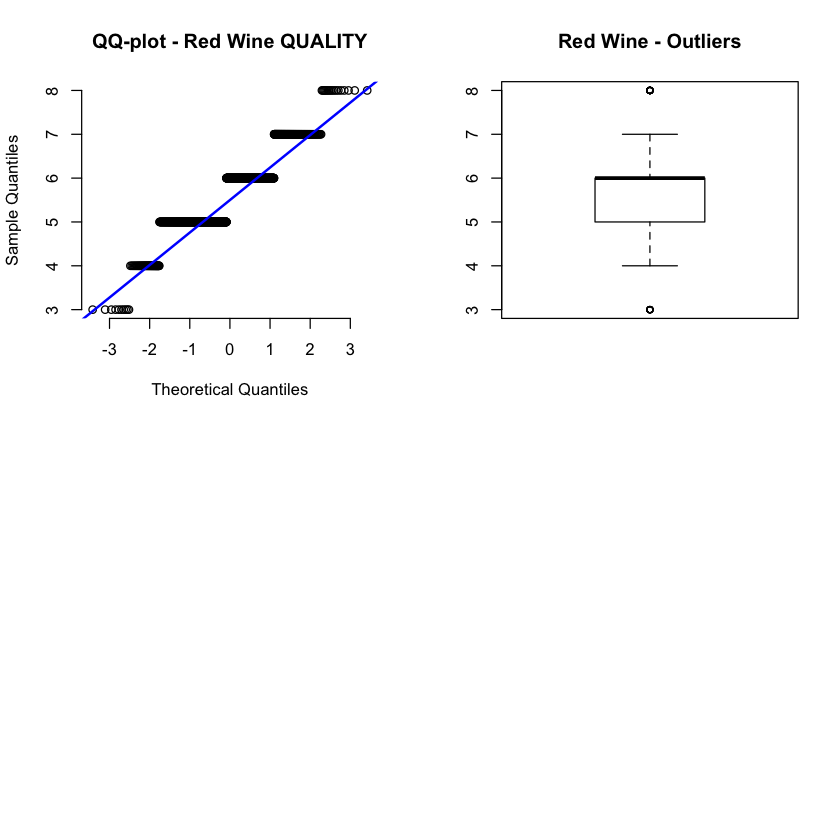

In [137]:
par(mfrow = c(2,2))
qqnorm(wine$quality, pch = 1, frame = FALSE, main = 'QQ-plot - Red Wine QUALITY')
qqline(wine$quality, col = "blue", lwd = 2)
boxplot(wine$quality, main = 'Red Wine - Outliers')


In [138]:
grubbs.test(wine$quality, type =10)


	Grubbs test for one outlier

data:  wine$quality
G = 3.26414, U = 0.99333, p-value = 0.8626
alternative hypothesis: lowest value 3 is an outlier


Our dataset does not have any missing values. 

Our response variable "Quality" is a categorical one with the ranks from 1 to 10.
The range of values (min/max) across the variables does not require scaling or normalization. All predictors are numerical.


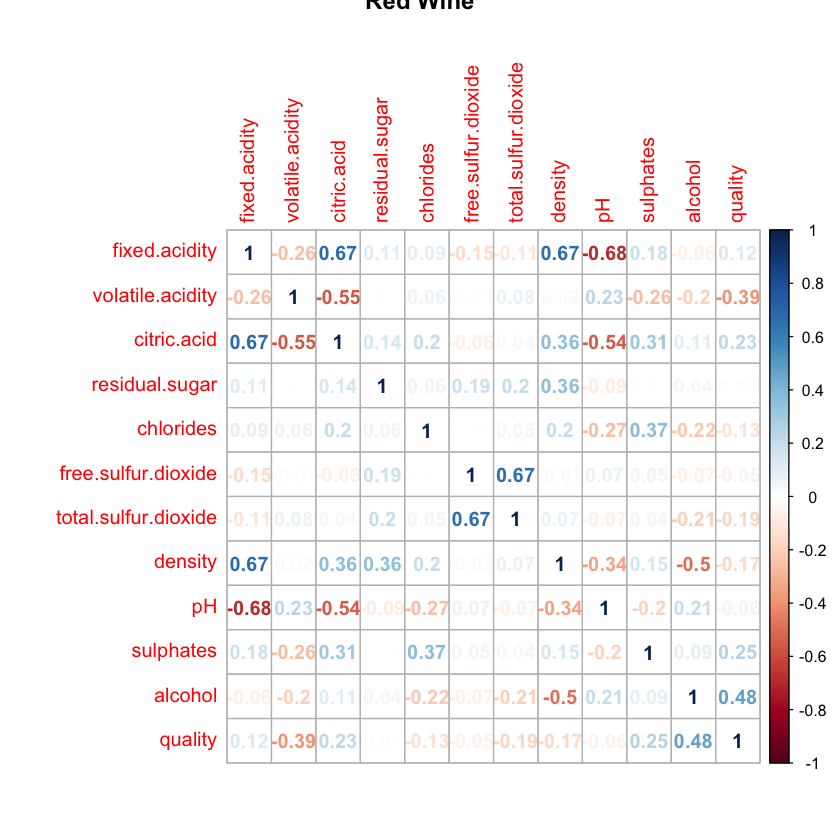

In [139]:
corrplot(cor(wine[1:(length(wine))]), method="number", main = "Red Wine")

Covariance Matrix

There is some significant multicollineraity between several variables:

density - alcohol
total.sulfur.dioxide - free.sulfur.dioxide
density - residual.sugar
residual.sugar - total.sulfur.dioxide
density - fixed.acidity

Certain predictors will have to be removed. Most likely candidates are:

free.sulfur.dioxide
residual.sugar
fixed.acidity
alcohol


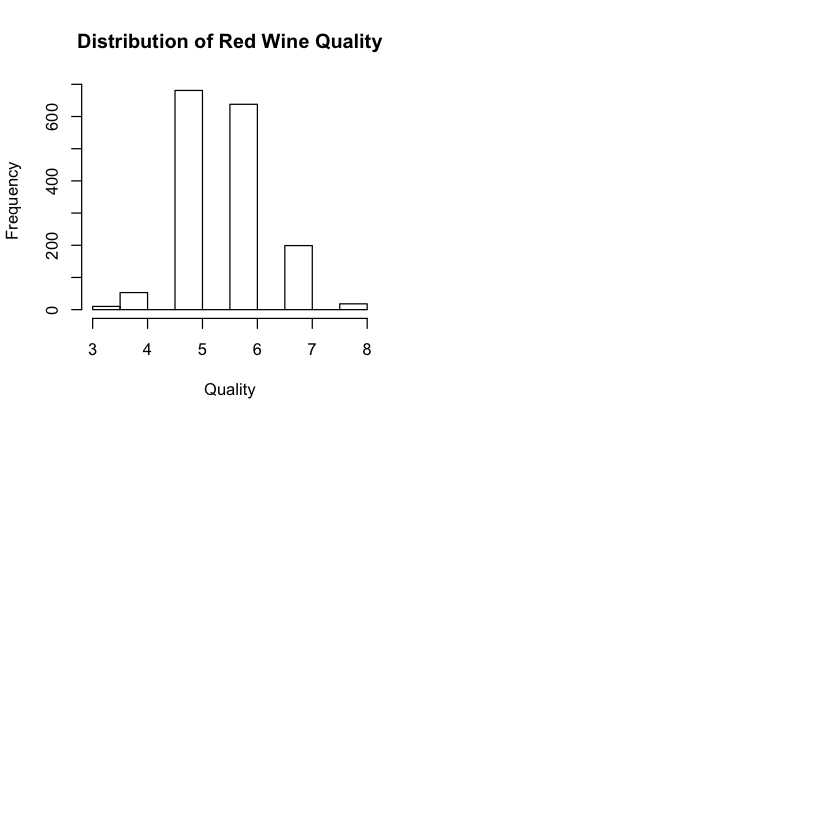

In [140]:
par(mfrow = c(2,2))

hist(wine$quality,xlab = 'Quality', main = "Distribution of Red Wine Quality")
#hist(wine[wine$type == "white",]$quality,xlab = 'Quality', main = "Distribution of White Wine Quality")
#hist(wine[wine$type == "red",]$quality,xlab = 'Quality', main = "Distribution of Red Wine Quality")

The following objects are masked from wine (pos = 3):

    alcohol, chlorides, citric.acid, density, fixed.acidity,
    free.sulfur.dioxide, pH, quality, residual.sugar, sulphates,
    total.sulfur.dioxide, volatile.acidity

The following objects are masked from wine (pos = 4):

    alcohol, chlorides, citric.acid, density, fixed.acidity,
    free.sulfur.dioxide, pH, quality, residual.sugar, sulphates,
    total.sulfur.dioxide, volatile.acidity



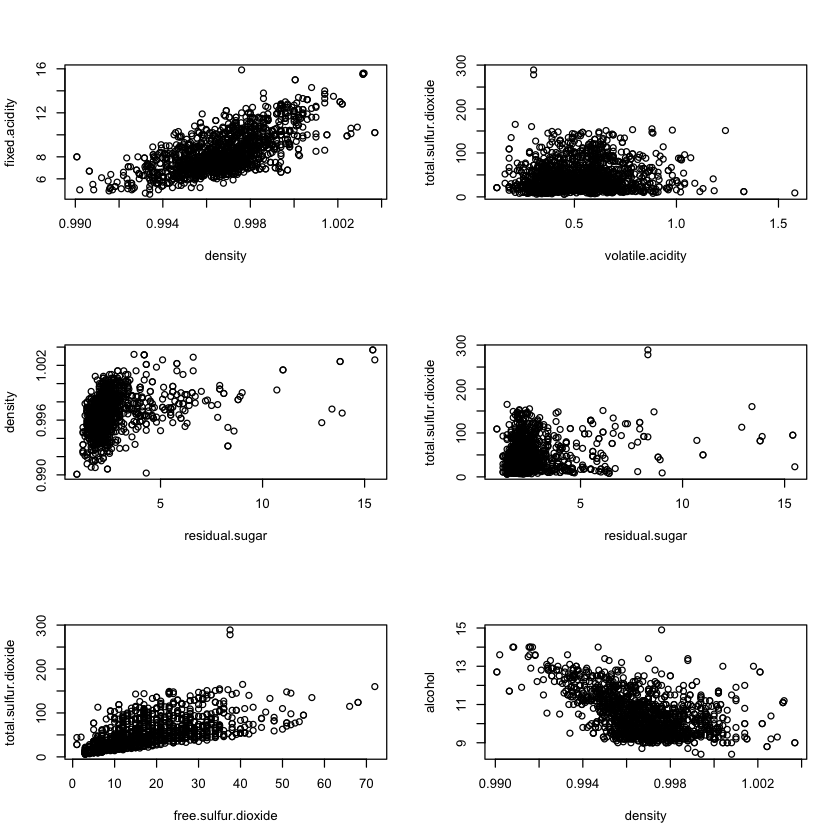

In [141]:
attach(wine)
par(mfrow = c(3,2))

plot(density, fixed.acidity)
plot(volatile.acidity, total.sulfur.dioxide)
plot(residual.sugar, density)
plot(residual.sugar, total.sulfur.dioxide)
plot(free.sulfur.dioxide, total.sulfur.dioxide)
plot(density, alcohol)

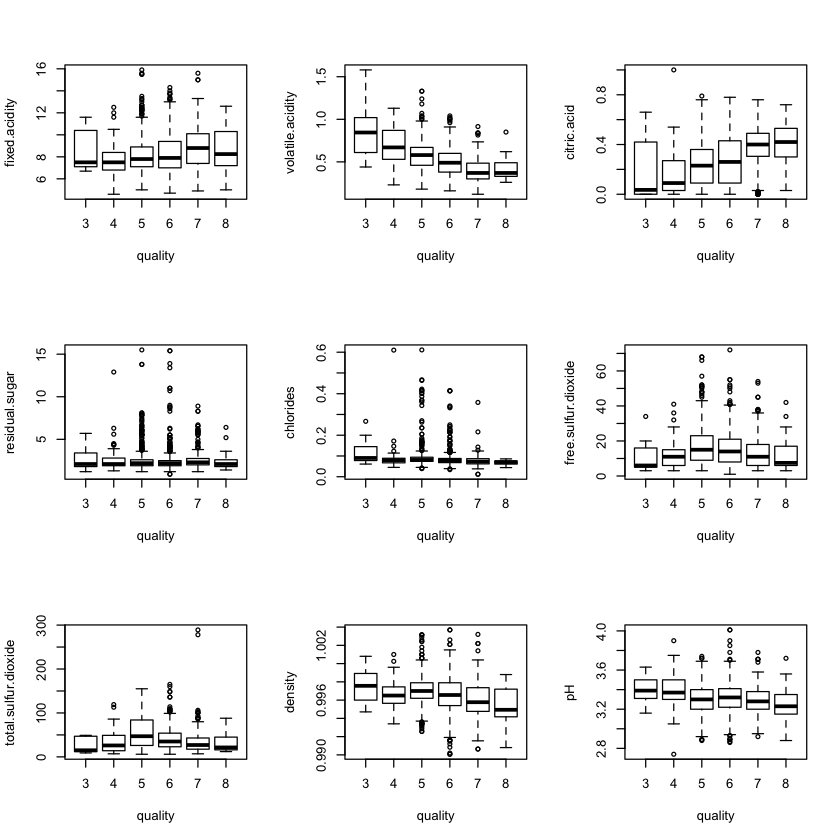

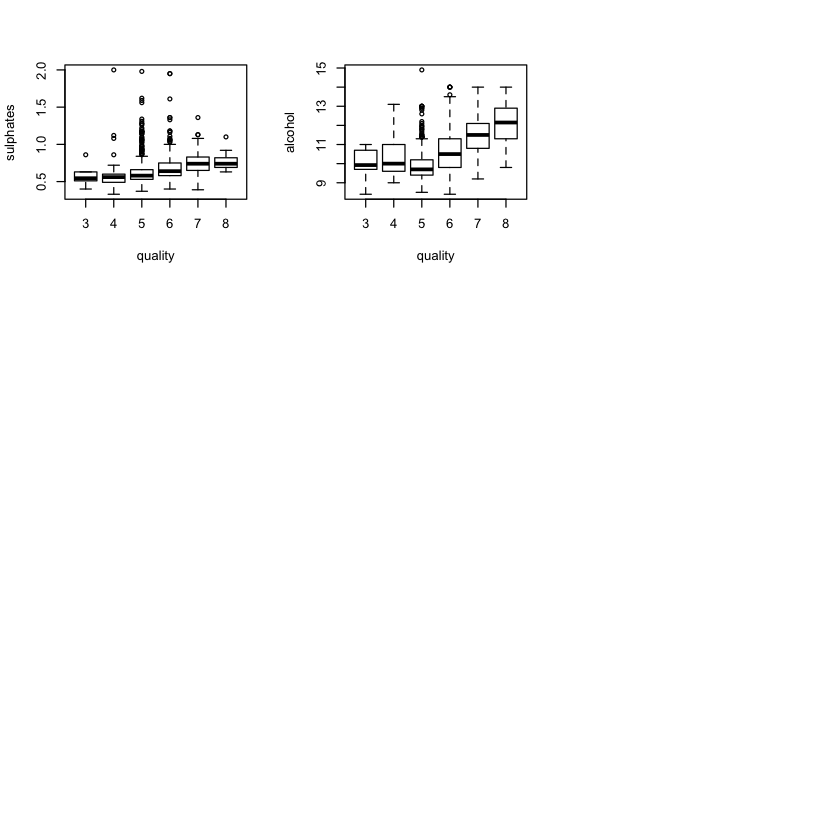

In [142]:
par(mfrow = c(3,3))
boxplot(fixed.acidity ~ quality)
boxplot(volatile.acidity ~ quality)
boxplot(citric.acid ~ quality)
boxplot(residual.sugar ~ quality)
boxplot(chlorides ~ quality)
boxplot(free.sulfur.dioxide ~ quality)
boxplot(total.sulfur.dioxide ~ quality)
boxplot(density ~ quality)
boxplot(pH ~ quality)
boxplot(sulphates ~ quality)
boxplot(alcohol ~ quality)

Data Preparation

In [199]:
#wine <- rbind(white, red)
wine.pr <- wine[1:11] # predictors only
wine.or <- wine #total dataset

# Response variable as a binary
wine$quality <- ifelse(wine$quality >= 6, 1,0)
wine$quality <- as.factor(wine$quality)
summary(wine)

#Random sampling
set.seed(7406)

test <- 0.2
ntr <- floor((1 - test)*nobs)
ind <- sample(nobs, ntr, replace = FALSE)

# Training and Test datasets
wine_train <- wine[ind,] # binary factor
wine_test <- wine[-ind,] 

wine_train_or <- wine.or[ind,] # original data
wine_test_or <- wine.or[-ind,]

wine_train_pr <- wine.pr[ind,] # predictors only
wine_test_pr <- wine.pr[-ind,]

print(paste('Total = ', nobs))
print(paste('Train = ', ntr))


 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

[1] "Total =  1599"
[1] "Train =  1279"


MODELING

We will start with converting scale values for "quality" from 1-10 to a binary system (0,1). A 1 will represent good wine and a 0 will represent "bad" wine.
We will analyze initial dataset using ordinal logistic regression at the end of this research.

At first, we will use logistic regression, KNN, SVM, Trees etc..

For Logistic regression, we romoved the following non-significant predictors:

density
fixed.acidity
residual.sugar

This is well-aligned with the conclusions from the covariance matrix


# Logistic Regression (Full Dataset)

### Logistic Regression with All Predictors

In [201]:
lgall <- glm(quality ~ ., data = wine, family = binomial(link="logit"))
summary(lgall)


Call:
glm(formula = quality ~ ., family = binomial(link = "logit"), 
    data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4025  -0.8387   0.3105   0.8300   2.3142  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           42.949948  79.473979   0.540  0.58890    
fixed.acidity          0.135980   0.098483   1.381  0.16736    
volatile.acidity      -3.281694   0.488214  -6.722 1.79e-11 ***
citric.acid           -1.274347   0.562730  -2.265  0.02354 *  
residual.sugar         0.055326   0.053770   1.029  0.30351    
chlorides             -3.915713   1.569298  -2.495  0.01259 *  
free.sulfur.dioxide    0.022220   0.008236   2.698  0.00698 ** 
total.sulfur.dioxide  -0.016394   0.002882  -5.688 1.29e-08 ***
density              -50.932385  81.148745  -0.628  0.53024    
pH                    -0.380608   0.720203  -0.528  0.59717    
sulphates              2.795107   0.452184   6.181 6.36e-10 ***
alcohol         

In [202]:
wald.test(Sigma = vcov(lgall), b = coef(lgall), Terms = 1:length(lgall$coef))

Wald test:
----------

Chi-squared test:
X2 = 356.5, df = 12, P(> X2) = 0.0

Since p-value = 0.0, then there are no non-significant coefficients.

In [203]:
aiclgall <- round(AIC(lgall),1)
biclgall <- round(BIC(lgall),1)

print(paste('AIC = ', aiclgall, '     BIC = ', biclgall))

[1] "AIC =  1679.6      BIC =  1744.2"


In [204]:
print('Significance Ranking')
round(vif(lgall),3)

[1] "Significance Ranking"


fixed.acidity     volatile.acidity          citric.acid 
               7.969                1.777                3.280 
      residual.sugar            chlorides  free.sulfur.dioxide 
               1.721                1.576                2.015 
total.sulfur.dioxide              density                   pH 
               2.191                5.768                3.439 
           sulphates              alcohol 
               1.482                2.290

In [205]:
# Confidence Intervals

exp(cbind(OR = coef(lgall), confint(lgall)))

Waiting for profiling to be done...


OR           2.5 %        97.5 %      
(Intercept)          4.497027e+18 9.875179e-50 2.611259e+86
fixed.acidity        1.145659e+00 9.453487e-01 1.391245e+00
volatile.acidity     3.756458e-02 1.417753e-02 9.623115e-02
citric.acid          2.796134e-01 9.208797e-02 8.372148e-01
residual.sugar       1.056885e+00 9.505294e-01 1.174768e+00
chlorides            1.992634e-02 8.561776e-04 4.097313e-01
free.sulfur.dioxide  1.022469e+00 1.006133e+00 1.039179e+00
total.sulfur.dioxide 9.837397e-01 9.780924e-01 9.892261e-01
density              7.591825e-23 4.731209e-92 8.931309e+46
pH                   6.834461e-01 1.670776e-01 2.818561e+00
sulphates            1.636437e+01 6.881270e+00 4.054391e+01
alcohol              2.379338e+00 1.943967e+00 2.925369e+00

In [206]:
print('Error')
prediction <- predict(lgall,wine[,1:11], type = "response")
prediction <- ifelse(prediction>= .5, 1,0)

[1] "Error"


In [207]:
cm <- confusionMatrix(wine$quality, as.factor(prediction))
print(cm)

print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 549 195
         1 214 641
                                          
               Accuracy : 0.7442          
                 95% CI : (0.7221, 0.7654)
    No Information Rate : 0.5228          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4868          
                                          
 Mcnemar's Test P-Value : 0.3734          
                                          
            Sensitivity : 0.7195          
            Specificity : 0.7667          
         Pos Pred Value : 0.7379          
         Neg Pred Value : 0.7497          
             Prevalence : 0.4772          
         Detection Rate : 0.3433          
   Detection Prevalence : 0.4653          
      Balanced Accuracy : 0.7431          
                                          
       'Positive' Class : 0               
                              

### Logistic Regression with Significant Predictors

In [208]:
lgsig <- glm(quality ~ .- residual.sugar - fixed.acidity - density - citric.acid - pH, 
             data = wine, family = binomial(link="logit"))
summary(lgsig)


Call:
glm(formula = quality ~ . - residual.sugar - fixed.acidity - 
    density - citric.acid - pH, family = binomial(link = "logit"), 
    data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0827  -0.8539   0.3241   0.8369   2.3080  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.149844   0.809006 -10.074  < 2e-16 ***
volatile.acidity     -2.895939   0.370675  -7.813 5.60e-15 ***
chlorides            -4.421027   1.432052  -3.087  0.00202 ** 
free.sulfur.dioxide   0.023862   0.007987   2.988  0.00281 ** 
total.sulfur.dioxide -0.017505   0.002707  -6.468 9.95e-11 ***
sulphates             2.705876   0.427543   6.329 2.47e-10 ***
alcohol               0.859379   0.070725  12.151  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2209.0  on 1598  degrees of freedom
Residual deviance: 1664.7  on 15

In [209]:
wald.test(Sigma = vcov(lgsig), b = coef(lgsig), Terms = 1:length(lgsig$coef))

Wald test:
----------

Chi-squared test:
X2 = 353.6, df = 7, P(> X2) = 0.0

In [210]:
aiclgsig <- round(AIC(lgsig),1)
biclgsig <- round(BIC(lgsig),1)

print(paste('AIC = ', aiclgsig, '     BIC = ', biclgsig))

[1] "AIC =  1678.7      BIC =  1716.4"


In [211]:
print('Significance Ranking')
round(vif(lgsig),3)

[1] "Significance Ranking"


volatile.acidity            chlorides  free.sulfur.dioxide 
               1.046                1.347                1.876 
total.sulfur.dioxide            sulphates              alcohol 
               1.912                1.359                1.061

In [212]:
exp(cbind(OR = coef(lgsig), confint(lgsig)))

Waiting for profiling to be done...


OR           2.5 %        97.5 %      
(Intercept)          2.887804e-04 5.790494e-05  0.001382764
volatile.acidity     5.524713e-02 2.647643e-02  0.113314431
chlorides            1.202188e-02 6.719787e-04  0.188811030
free.sulfur.dioxide  1.024149e+00 1.008293e+00  1.040386786
total.sulfur.dioxide 9.826471e-01 9.773245e-01  0.987765461
sulphates            1.496742e+01 6.599082e+00 35.310209138
alcohol              2.361693e+00 2.060864e+00  2.719686654

In [213]:
print('Error')
predictions <- predict(lgsig,wine[,1:11], type = "response")
predictions <- ifelse(predictions >= .5, 1,0)

cm <- confusionMatrix(wine$quality, as.factor(predictions))
print(cm)

print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

[1] "Error"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 559 185
         1 215 640
                                          
               Accuracy : 0.7498          
                 95% CI : (0.7279, 0.7709)
    No Information Rate : 0.5159          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4986          
                                          
 Mcnemar's Test P-Value : 0.1471          
                                          
            Sensitivity : 0.7222          
            Specificity : 0.7758          
         Pos Pred Value : 0.7513          
         Neg Pred Value : 0.7485          
             Prevalence : 0.4841          
         Detection Rate : 0.3496          
   Detection Prevalence : 0.4653          
      Balanced Accuracy : 0.7490          
                                          
       'Positive' Class : 0               
                  

# KMEANS (FULL dataset)

Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”

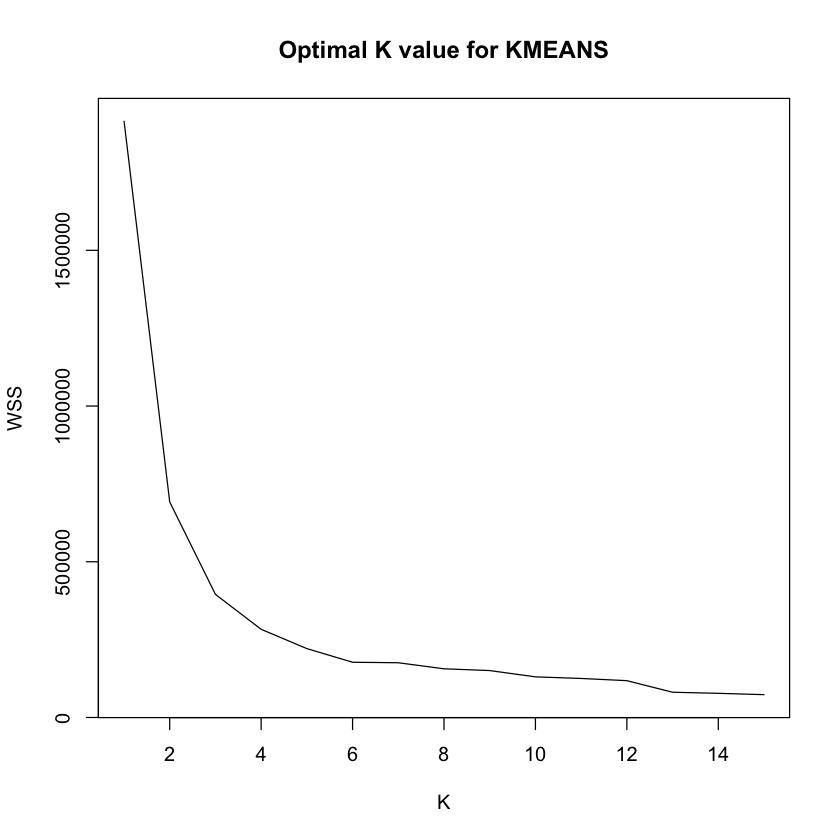

In [214]:
num <- 15
nst <- 10 #Initial number of centroids

res_fin <- matrix(0, num, 1) 

for (k in 1:num) {
  
    kmd <- kmeans(wine.pr, k, nstart = nst)
    kvl <- kmd$tot.withinss
    res_fin[k] <- kvl
}

plot(res_fin, type = 'l', ylab = 'WSS', xlab = 'K',
     main = 'Optimal K value for KMEANS')


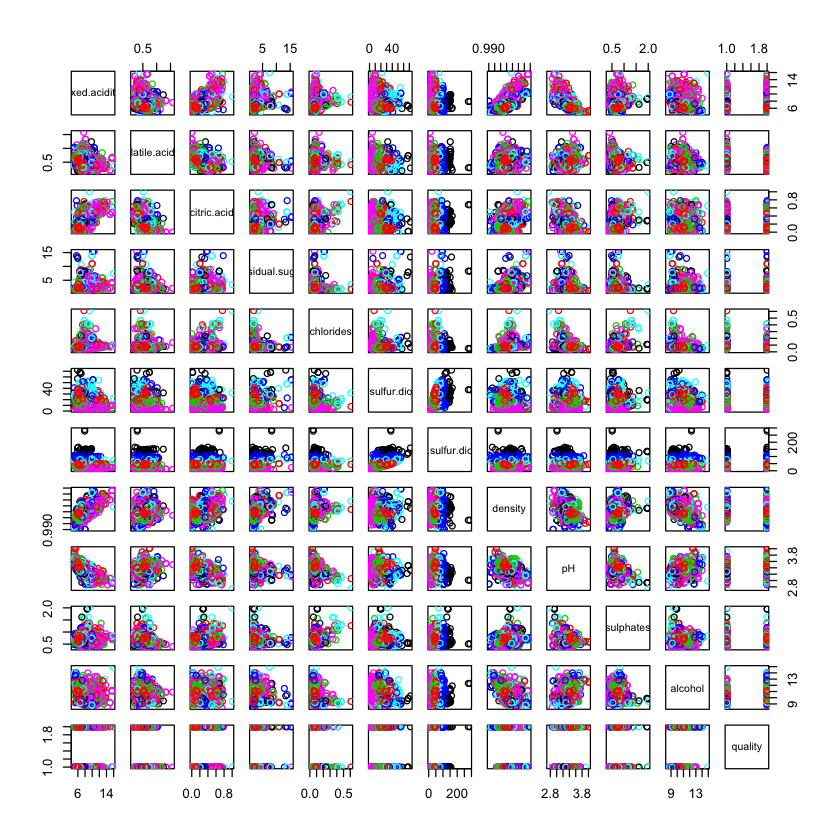

In [215]:
# WSS Method

kbest <- 6 # The best K Value
fitK = kmeans(wine.pr, kbest, nstart = 5)
plot(wine,col = fitK$cluster)



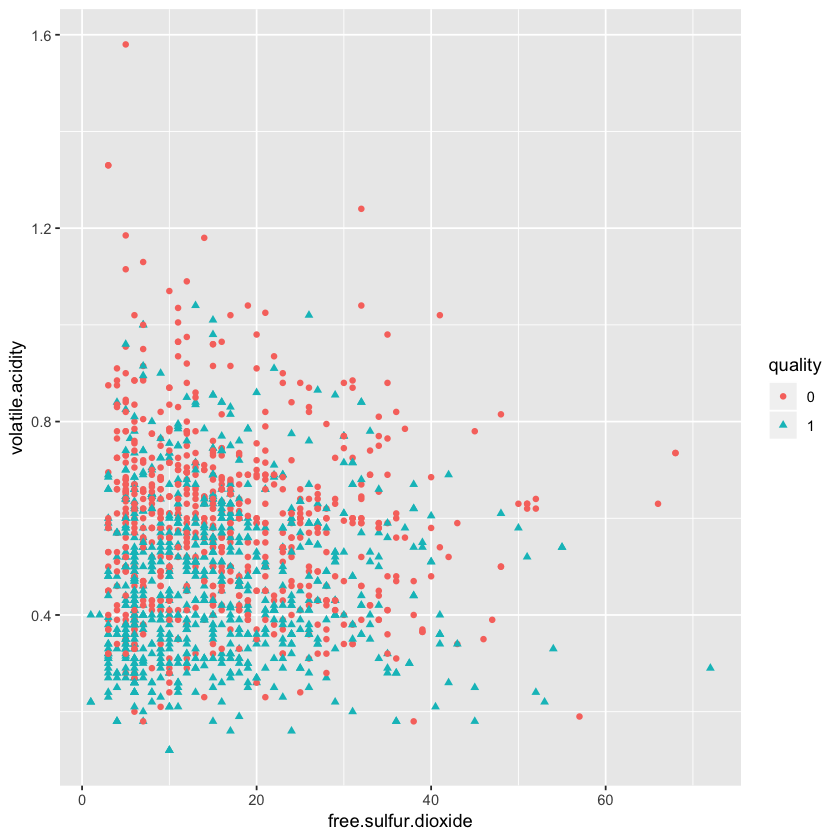

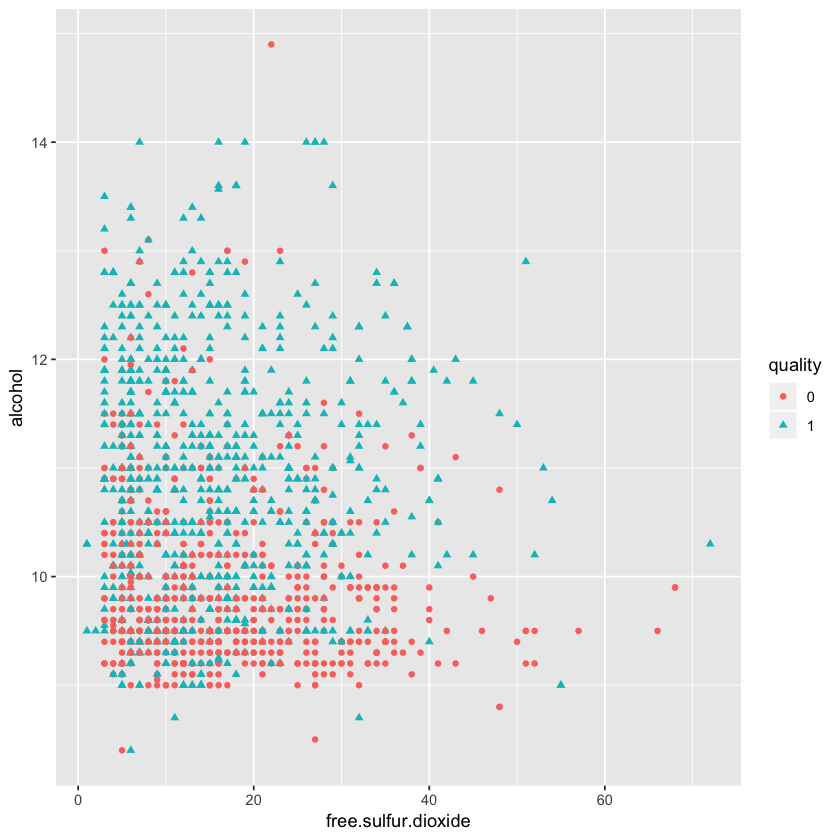

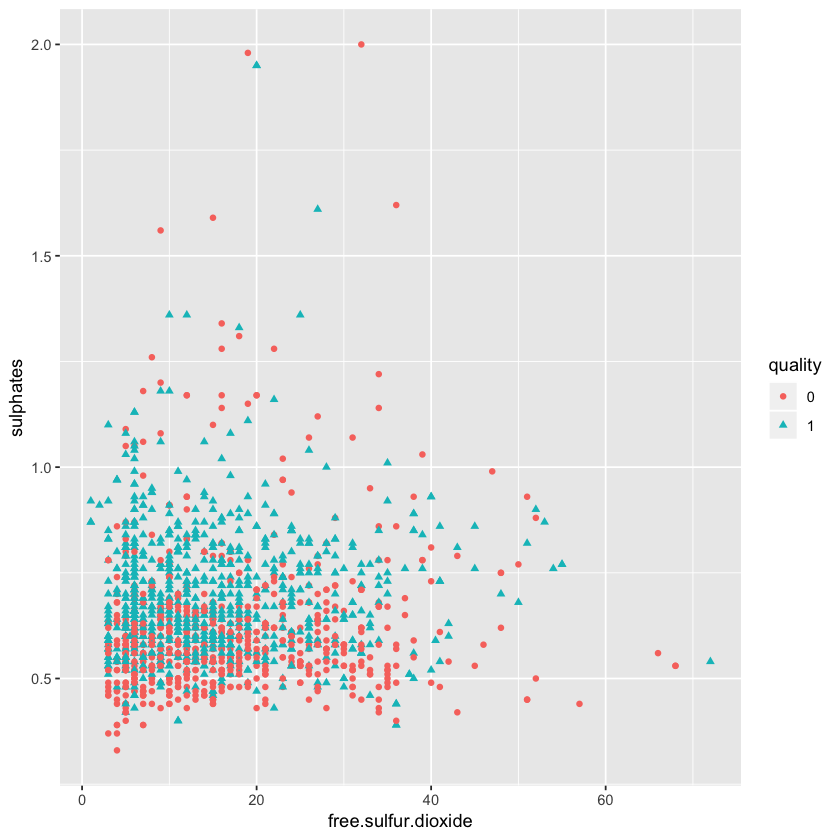

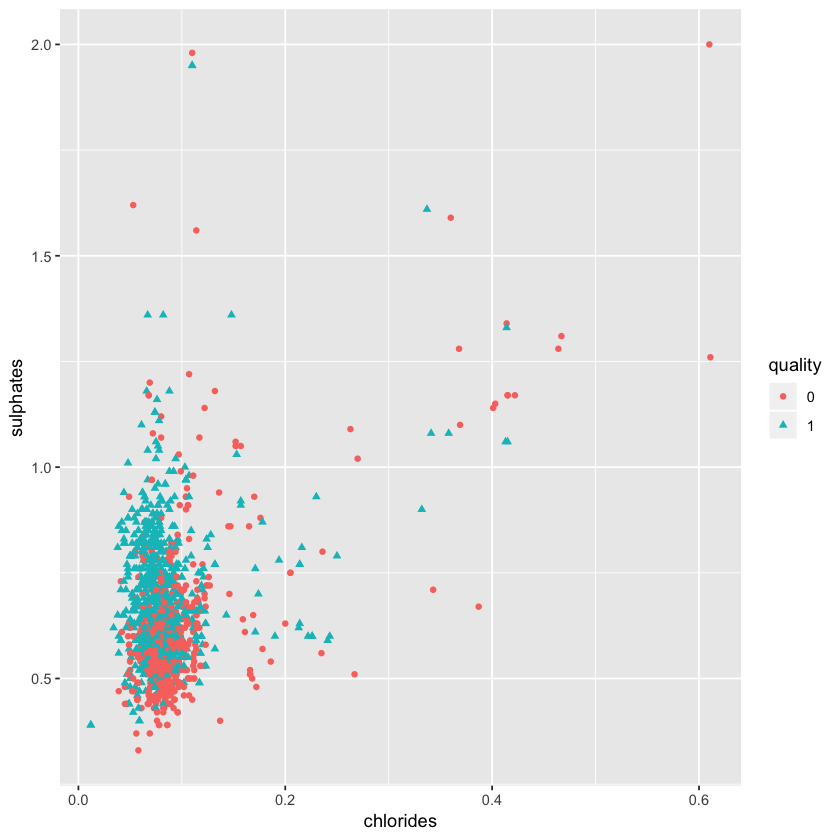

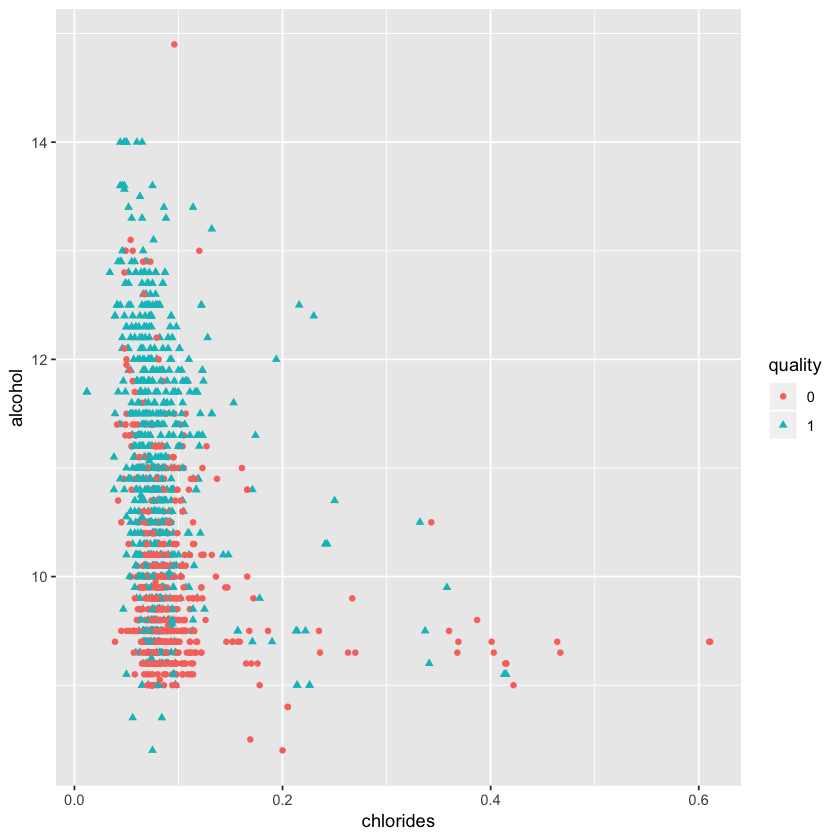

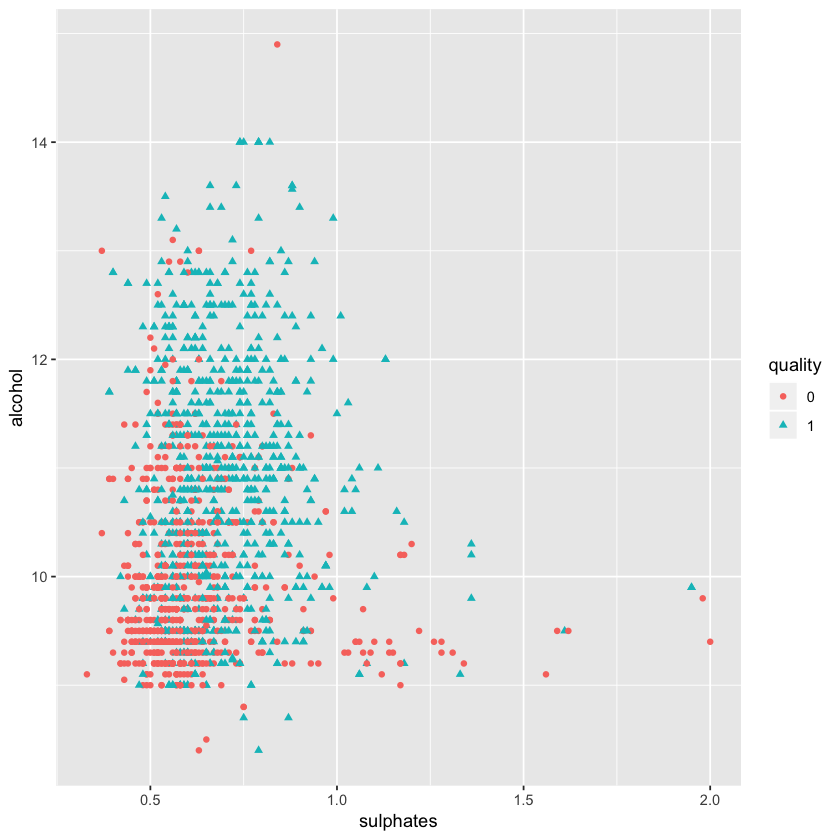

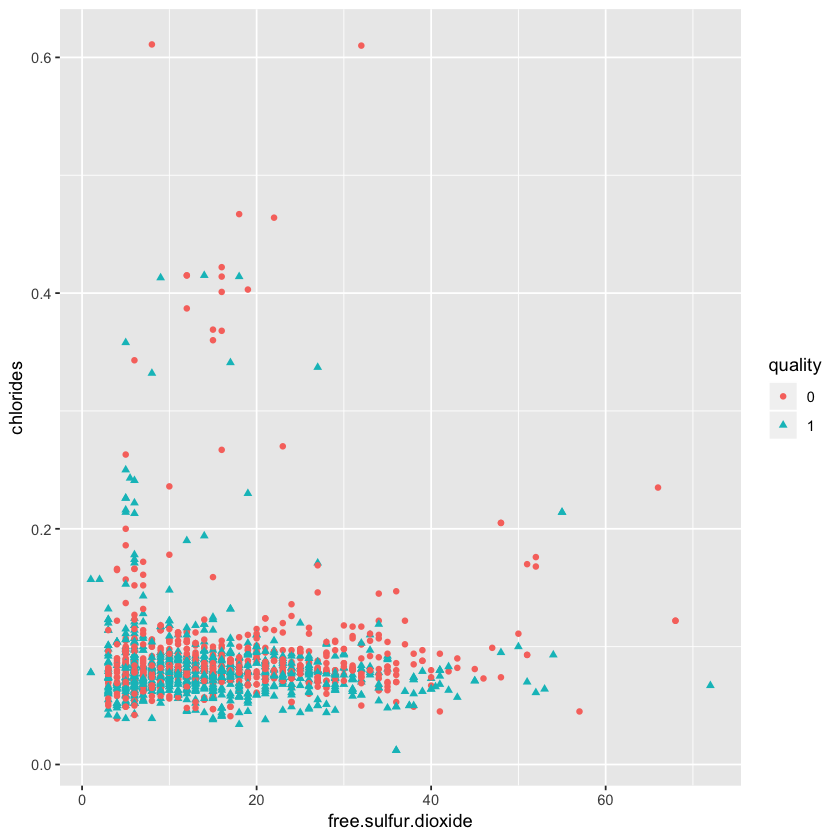

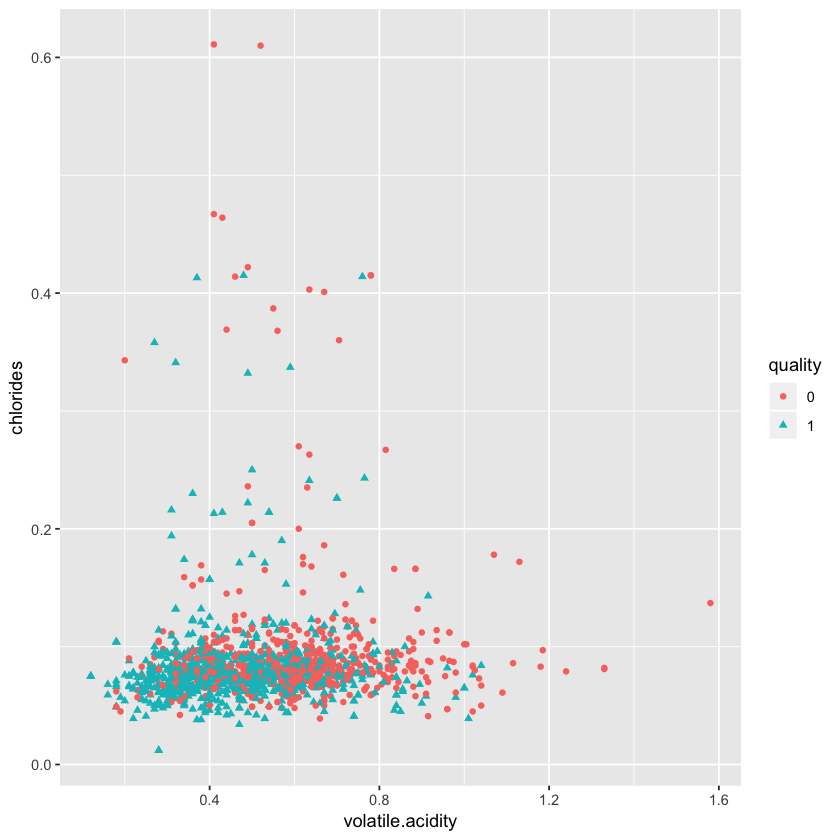

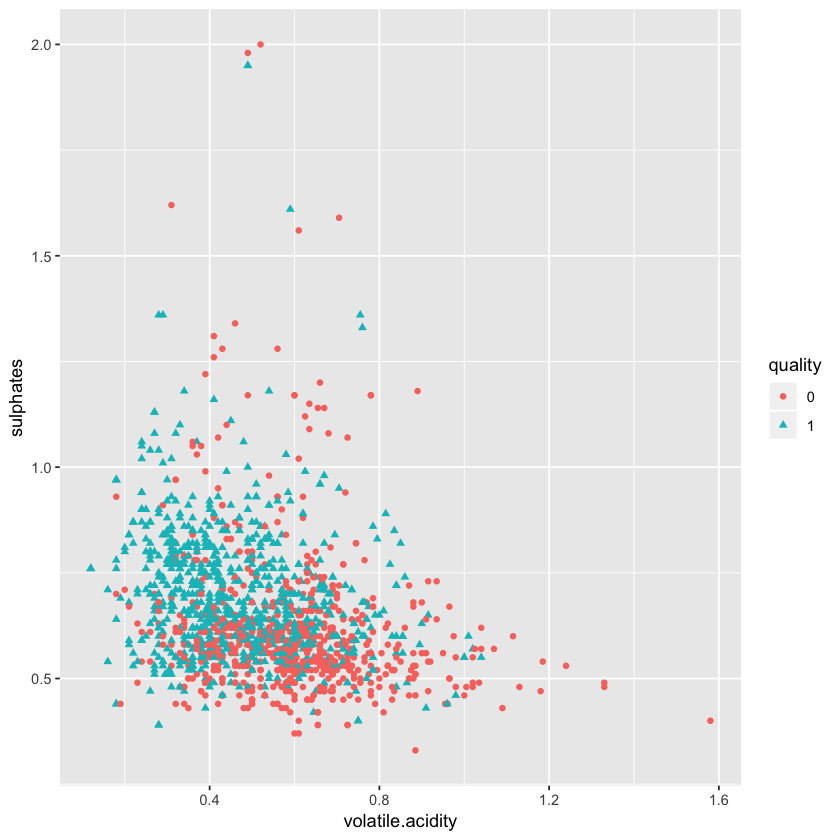

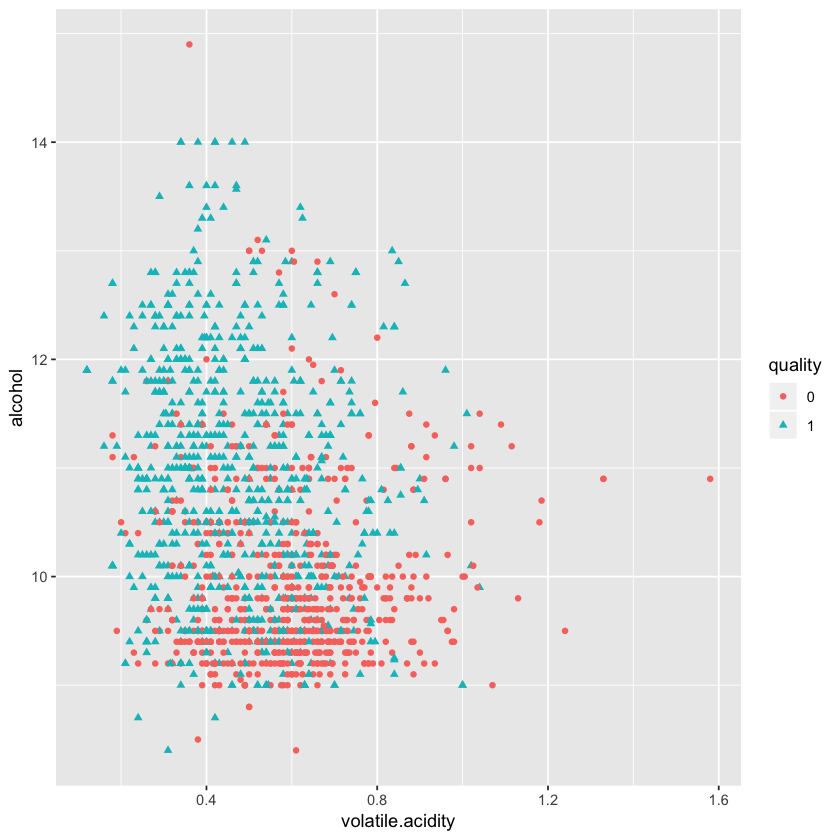

In [216]:
ggplot(wine, aes(x = free.sulfur.dioxide, y = volatile.acidity, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = free.sulfur.dioxide, y = alcohol, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = free.sulfur.dioxide, y = sulphates, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = chlorides, y = sulphates, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = chlorides, y = alcohol, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = sulphates, y = alcohol, shape = quality, col = quality)) + geom_point()

ggplot(wine, aes(x = free.sulfur.dioxide, y = chlorides, shape = quality, 
                 col = quality))+geom_point()

ggplot(wine, aes(x = volatile.acidity, y = chlorides, shape = quality, col = quality))+geom_point()

ggplot(wine, aes(x = volatile.acidity, y = sulphates, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = volatile.acidity, y = alcohol, shape = quality, col = quality))+geom_point()


# The data is not separable. Thus KNN is preferred choice over SVM


In [27]:
library(factoextra)
fviz_cluster(fitK, data = wine.pr)

ERROR: Error in library(factoextra): there is no package called ‘factoextra’


# KNN

1 = 78.75 2 = 73.75 3 = 71.25 4 = 69.0625 5 = 68.125 6 = 65.625 7 = 64.6875 8 = 66.25 9 = 66.875 10 = 67.8125 11 = 67.8125 12 = 68.125 13 = 69.0625 14 = 69.6875 15 = 68.75 16 = 69.0625 17 = 67.5 18 = 67.1875 19 = 65.9375 20 = 66.25 21 = 65 22 = 66.5625 23 = 65.9375 24 = 65.9375 25 = 66.25 26 = 65.3125 27 = 64.6875 28 = 65.625 

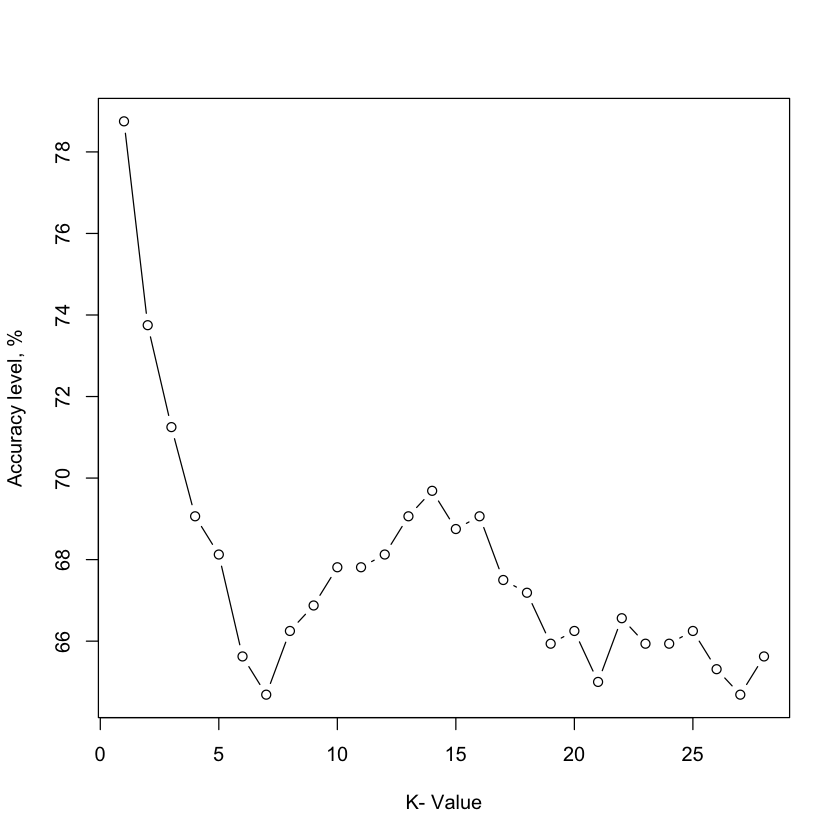

In [217]:
i=1
k.optm=1

for (i in 1:28){
    knn.mod <- knn(train=wine_train, test=wine_test, cl=wine_train$quality, k=i)
    
    k.optm[i] <- 100 * sum(wine_test$quality == knn.mod)/(nobs - ntr)
    
    k=i    
    cat(k,'=',k.optm[i],'')
}

plot(k.optm, type="b", xlab="K- Value",ylab="Accuracy level, %")

In [218]:
kknb <- 2

knn <- knn(train=wine_train, test=wine_test, cl=wine_train$quality, k= kknb)

In [219]:
cm <- confusionMatrix(wine_test$quality, as.factor(knn))
print(cm)

print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 103  50
         1  41 126
                                          
               Accuracy : 0.7156          
                 95% CI : (0.6628, 0.7644)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : 8.579e-10       
                                          
                  Kappa : 0.4288          
                                          
 Mcnemar's Test P-Value : 0.4017          
                                          
            Sensitivity : 0.7153          
            Specificity : 0.7159          
         Pos Pred Value : 0.6732          
         Neg Pred Value : 0.7545          
             Prevalence : 0.4500          
         Detection Rate : 0.3219          
   Detection Prevalence : 0.4781          
      Balanced Accuracy : 0.7156          
                                          
       'Positive' Class : 0               
                              

# SVM


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "linear", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.09090909 

Number of Support Vectors:  753


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "linear", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  2 
      gamma:  0.09090909 

Number of Support Vectors:  752


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "linear", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  3 
      gamma:  0.09090909 

Number of Support Vectors:  752


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "linear", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 

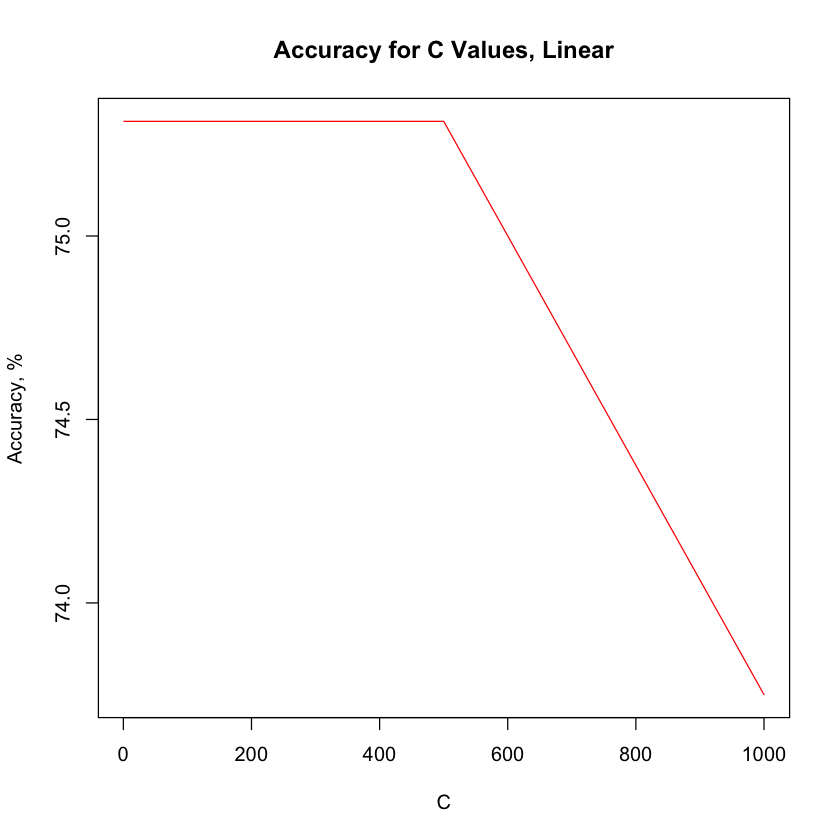

In [220]:
# Linear Classifier

results_c <- matrix(rep(0, len=20), nrow = 2)

c_value = c(1, 2, 3, 5, 10, 20, 50, 100, 500, 1000) # C values
cl = length(c_value) 

for (j in 1:cl) {
  
    cj <- c_value[j]
    results_c[1,j] <- cj
    
    msvm <- svm(formula = quality ~ .,
                data = wine_train,
                type = 'C-classification',
                kernel = 'linear',
                cost = cj,
                scaled = TRUE)
    
    print(msvm) # display the model

  # Model Prediction and Accuracy
    pred <- predict(msvm, wine_test[,1:11])
    acc = 100* sum(pred == wine_test$quality) / (nobs - ntr)
     
    results_c[2,j] <- acc   
    
}

print(results_c)
plot(results_c[1,], results_c[2,], main="Accuracy for C Values, Linear",
     ylab = "Accuracy, %", xlab = "C", type = "l", col = "red")

cl_best <- which.max(results_c[2,])
print(paste(' Best C = ', c_value[cl_best], '   Accuracy = ', round(results_c[2,cl_best],3)))



Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "radial", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.09090909 

Number of Support Vectors:  795


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "radial", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  2 
      gamma:  0.09090909 

Number of Support Vectors:  760


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "radial", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  3 
      gamma:  0.09090909 

Number of Support Vectors:  764


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "radial", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 

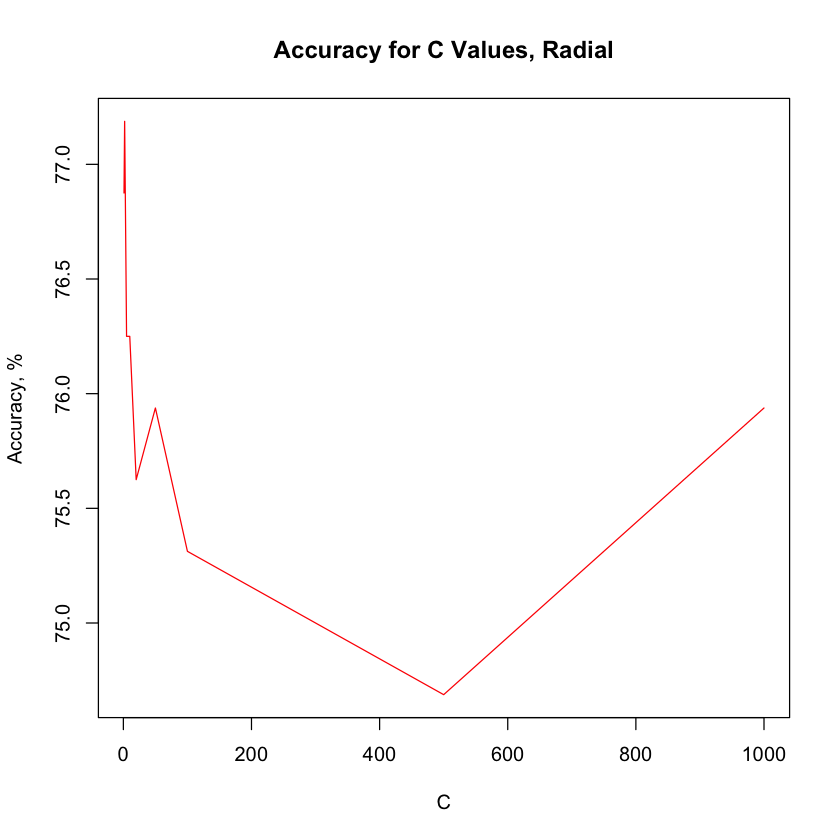

In [221]:
# Radial Kernel

results_c <- matrix(rep(0, len=20), nrow = 2)

c_value = c(1, 2, 3, 5, 10, 20, 50, 100, 500, 1000) # C values
cl = length(c_value) 

for (j in 1:cl) {
  
  cj <- c_value[j]
  results_c[1,j] <- cj
    
  msvmr <- svm(formula = quality ~ .,
                data = wine_train,
                type = 'C-classification',
                kernel = 'radial',
                cost = cj,
                scaled = TRUE)
    
  print(msvmr) # display the model

  # Model Prediction and Accuracy
  pred <- predict(msvmr,wine_test[,1:11])
  acc = 100* sum(pred == wine_test$quality) / (nobs - ntr)
  results_c[2,j] <- acc
    
}

plot(results_c[1,], results_c[2,],main="Accuracy for C Values, Radial",
     ylab = "Accuracy, %", xlab = "C", type = "l", col = "red")

cr_best <- which.max(results_c[2,])
print(paste(' Best C = ', c_value[cr_best], '   Accuracy = ', round(results_c[2,cr_best],3)))


# Ordinal Regression

In [222]:
# All predictors - Train / Test
ord_mod <- polr(formula = as.factor(quality) ~., 
                data = wine_train_or, Hess = TRUE)
summary(ord_mod)


Call:
polr(formula = as.factor(quality) ~ ., data = wine_train_or, 
    Hess = TRUE)

Coefficients:
                         Value Std. Error t value
fixed.acidity          0.11270   0.057088   1.974
volatile.acidity      -3.15151   0.440164  -7.160
citric.acid           -0.89700   0.514285  -1.744
residual.sugar         0.05440   0.043519   1.250
chlorides             -5.75120   1.532298  -3.753
free.sulfur.dioxide    0.01421   0.007493   1.897
total.sulfur.dioxide  -0.01076   0.002630  -4.091
density              -30.74147   1.087270 -28.274
pH                    -1.27885   0.555972  -2.300
sulphates              2.84028   0.400508   7.092
alcohol                0.92872   0.067364  13.787

Intercepts:
    Value    Std. Error t value 
3|4 -31.0062   1.1137   -27.8417
4|5 -29.0457   1.1112   -26.1400
5|6 -25.2369   1.1152   -22.6295
6|7 -22.2744   1.1294   -19.7216
7|8 -19.4254   1.1597   -16.7500

Residual Deviance: 2413.602 
AIC: 2445.602 

In [223]:
(ctable <- coef(summary(ord_mod)))

Value        Std. Error  t value   
fixed.acidity          0.11269653 0.057087671   1.974096
volatile.acidity      -3.15151402 0.440164237  -7.159859
citric.acid           -0.89699972 0.514285446  -1.744167
residual.sugar         0.05440455 0.043519107   1.250130
chlorides             -5.75120405 1.532297529  -3.753321
free.sulfur.dioxide    0.01421266 0.007492684   1.896872
total.sulfur.dioxide  -0.01075792 0.002629568  -4.091135
density              -30.74147159 1.087270154 -28.273996
pH                    -1.27885352 0.555971668  -2.300213
sulphates              2.84028189 0.400508190   7.091695
alcohol                0.92872438 0.067363712  13.786716
3|4                  -31.00620853 1.113662344 -27.841660
4|5                  -29.04572281 1.111159043 -26.140023
5|6                  -25.23686999 1.115219939 -22.629500
6|7                  -22.27441326 1.129444907 -19.721558
7|8                  -19.42543312 1.159724160 -16.750046

In [224]:
## calculate and store p values
p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable <- cbind(ctable, "p value" = p))

Value        Std. Error  t value    p value      
fixed.acidity          0.11269653 0.057087671   1.974096  4.837084e-02
volatile.acidity      -3.15151402 0.440164237  -7.159859  8.075988e-13
citric.acid           -0.89699972 0.514285446  -1.744167  8.112997e-02
residual.sugar         0.05440455 0.043519107   1.250130  2.112520e-01
chlorides             -5.75120405 1.532297529  -3.753321  1.745074e-04
free.sulfur.dioxide    0.01421266 0.007492684   1.896872  5.784479e-02
total.sulfur.dioxide  -0.01075792 0.002629568  -4.091135  4.292673e-05
density              -30.74147159 1.087270154 -28.273996 7.218021e-176
pH                    -1.27885352 0.555971668  -2.300213  2.143613e-02
sulphates              2.84028189 0.400508190   7.091695  1.324793e-12
alcohol                0.92872438 0.067363712  13.786716  3.063930e-43
3|4                  -31.00620853 1.113662344 -27.841660 1.359116e-170
4|5                  -29.04572281 1.111159043 -26.140023 1.279729e-150
5|6                  -25.23686999 1.115219939 -22.629500 2.221058e-113
6|7                  -22.27441326 1.129444907 -19.721558  1.408231e-86
7|8                  -19.42543312 1.159724160 -16.750046  5.658244e-63

In [225]:
confint.default(ord_mod) # CIs assuming normality

# If the move from 2.5% to 97.% includes a zero (a sign change) then this coefficient is NOT 
# statistically significant

2.5 %         97.5 %       
fixed.acidity         8.067558e-04   0.224586314
volatile.acidity     -4.014220e+00  -2.288807971
citric.acid          -1.904981e+00   0.110981228
residual.sugar       -3.089133e-02   0.139700432
chlorides            -8.754452e+00  -2.747956083
free.sulfur.dioxide  -4.727260e-04   0.028898054
total.sulfur.dioxide -1.591177e-02  -0.005604058
density              -3.287248e+01 -28.610461247
pH                   -2.368538e+00  -0.189169071
sulphates             2.055300e+00   3.625263516
alcohol               7.966939e-01   1.060754826

In [226]:
#Compute confusion table and misclassification error - TRAIN

predqualtr = predict(ord_mod,wine_train_or)
table(wine_train_or$quality, predqualtr)
cmactr <- mean(as.character(wine_train_or$quality) != as.character(predqualtr))
print(paste('All Predictors Training Accuracy = ', 1 - round(cmactr, 4)))

   predqualtr
      3   4   5   6   7   8
  3   0   0   6   1   0   0
  4   0   0  25  14   0   0
  5   0   0 406 137   2   0
  6   0   0 170 328  23   0
  7   0   0   4 114  33   0
  8   0   0   0   8   8   0

[1] "All Predictors Training Accuracy =  0.5997"


In [227]:
#Compute confusion table and misclassification error - TEST

predqualts = predict(ord_mod,wine_test_or)
table(wine_test_or$quality, predqualts)
cmacts <- mean(as.character(wine_test_or$quality) != as.character(predqualts))
print(paste('All Predictors Test Accuracy = ', 1 - round(cmacts, 4)))

   predqualts
      3   4   5   6   7   8
  3   0   0   3   0   0   0
  4   0   0  10   4   0   0
  5   0   0 105  30   0   1
  6   0   0  45  67   5   0
  7   0   0   3  35  10   0
  8   0   0   0   2   0   0

[1] "All Predictors Test Accuracy =  0.5688"


In [228]:
# Let's rerun the regression with only significant predictors

ord_mods <- polr(formula = as.factor(quality) ~. - citric.acid - fixed.acidity - residual.sugar, 
                 data = wine_train_or, Hess = TRUE)
summary(ord_mods)


Call:
polr(formula = as.factor(quality) ~ . - citric.acid - fixed.acidity - 
    residual.sugar, data = wine_train_or, Hess = TRUE)

Coefficients:
                        Value Std. Error t value
volatile.acidity     -2.78117   0.366499  -7.588
chlorides            -6.53910   1.467388  -4.456
free.sulfur.dioxide   0.01688   0.007376   2.289
total.sulfur.dioxide -0.01198   0.002504  -4.785
density              15.48824   0.729373  21.235
pH                   -1.63570   0.421031  -3.885
sulphates             2.77094   0.397380   6.973
alcohol               0.94937   0.065678  14.455

Intercepts:
    Value   Std. Error t value
3|4 13.3618  0.7181    18.6063
4|5 15.3175  0.7183    21.3240
5|6 19.1102  0.7226    26.4453
6|7 22.0700  0.7401    29.8190
7|8 24.9171  0.7870    31.6615

Residual Deviance: 2418.259 
AIC: 2444.259 

In [229]:
(ctable1 <- coef(summary(ord_mods)))

Value       Std. Error  t value  
volatile.acidity     -2.78117079 0.366499189 -7.588477
chlorides            -6.53909839 1.467388295 -4.456284
free.sulfur.dioxide   0.01688308 0.007376064  2.288901
total.sulfur.dioxide -0.01198213 0.002504330 -4.784564
density              15.48823864 0.729373259 21.234997
pH                   -1.63569573 0.421030879 -3.884978
sulphates             2.77094338 0.397379538  6.973040
alcohol               0.94936770 0.065678457 14.454781
3|4                  13.36181973 0.718133700 18.606312
4|5                  15.31750127 0.718323109 21.323971
5|6                  19.11020566 0.722630102 26.445350
6|7                  22.06995972 0.740130624 29.819006
7|8                  24.91707601 0.786982713 31.661529

In [230]:
confint.default(ord_mods) # CIs assuming normality

2.5 %        97.5 %      
volatile.acidity     -3.499495997 -2.062845576
chlorides            -9.415126603 -3.663070183
free.sulfur.dioxide   0.002426258  0.031339898
total.sulfur.dioxide -0.016890523 -0.007073731
density              14.058693323 16.917783961
pH                   -2.460901091 -0.810490372
sulphates             1.992093793  3.549792957
alcohol               0.820640288  1.078095108

In [231]:
#Compute confusion table and misclassification error - TRAIN

predqualtrs = predict(ord_mods,wine_train_or)
table(wine_train_or$quality, predqualtrs)
cmactrs <- mean(as.character(wine_train_or$quality) != as.character(predqualtrs))
print(paste('Significant Predictors Training Accuracy = ', 1 - round(cmactrs, 4)))


   predqualtrs
      3   4   5   6   7   8
  3   0   0   6   1   0   0
  4   0   0  27  12   0   0
  5   0   0 406 137   2   0
  6   0   0 176 324  21   0
  7   0   0   4 113  34   0
  8   0   0   0   8   8   0

[1] "Significant Predictors Training Accuracy =  0.5973"


In [232]:
#Compute confusion table and misclassification error - TEST

predqualtss = predict(ord_mods,wine_test_or)
table(wine_test_or$quality, predqualtss)
cmactss <- mean(as.character(wine_test_or$quality) != as.character(predqualtss))
print(paste('Significant Predictors Testing Accuracy = ', 1 - round(cmactss, 4)))

   predqualtss
      3   4   5   6   7   8
  3   0   0   3   0   0   0
  4   0   0  10   4   0   0
  5   0   0 104  31   0   1
  6   0   0  46  66   5   0
  7   0   0   3  37   8   0
  8   0   0   0   2   0   0

[1] "Significant Predictors Testing Accuracy =  0.5562"


Interpretation:

Rank 5: 104 correct and 59 incorrect
Rank 6: 66 correct and 70 incorrect
Rank 7: 8 correct and 5 incorrect
Rank 8: 0 correct and 1 incorrect

In [236]:
## calculate and store p values
p <- pnorm(abs(ctable1[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable1 <- cbind(ctable1, "p value" = p))

Value       Std. Error  t value   p value      
volatile.acidity     -2.78117079 0.366499189 -7.588477  3.236866e-14
chlorides            -6.53909839 1.467388295 -4.456284  8.339270e-06
free.sulfur.dioxide   0.01688308 0.007376064  2.288901  2.208513e-02
total.sulfur.dioxide -0.01198213 0.002504330 -4.784564  1.713585e-06
density              15.48823864 0.729373259 21.234997 4.537256e-100
pH                   -1.63569573 0.421030879 -3.884978  1.023391e-04
sulphates             2.77094338 0.397379538  6.973040  3.101646e-12
alcohol               0.94936770 0.065678457 14.454781  2.338732e-47
3|4                  13.36181973 0.718133700 18.606312  2.856131e-77
4|5                  15.31750127 0.718323109 21.323971 6.803319e-101
5|6                  19.11020566 0.722630102 26.445350 4.127001e-154
6|7                  22.06995972 0.740130624 29.819006 2.215476e-195
7|8                  24.91707601 0.786982713 31.661529 5.262580e-220
                     p value      
volatile.acidity      3.236866e-14
chlorides             8.339270e-06
free.sulfur.dioxide   2.208513e-02
total.sulfur.dioxide  1.713585e-06
density              4.537256e-100
pH                    1.023391e-04
sulphates             3.101646e-12
alcohol               2.338732e-47
3|4                   2.856131e-77
4|5                  6.803319e-101
5|6                  4.127001e-154
6|7                  2.215476e-195
7|8                  5.262580e-220

In [237]:
ci1 <- confint.default(ord_mods) # CIs assuming normality
ci1

# All predictors are significant

2.5 %        97.5 %      
volatile.acidity     -3.499495997 -2.062845576
chlorides            -9.415126603 -3.663070183
free.sulfur.dioxide   0.002426258  0.031339898
total.sulfur.dioxide -0.016890523 -0.007073731
density              14.058693323 16.917783961
pH                   -2.460901091 -0.810490372
sulphates             1.992093793  3.549792957
alcohol               0.820640288  1.078095108

In [238]:
## odds ratios - These coefficients are called proportional odds ratios
exp(cbind(OR = coef(ord_mods), ci1))

OR           2.5 %        97.5 %      
volatile.acidity     6.196592e-02 3.021261e-02 1.270918e-01
chlorides            1.445791e-03 8.148215e-05 2.565363e-02
free.sulfur.dioxide  1.017026e+00 1.002429e+00 1.031836e+00
total.sulfur.dioxide 9.880894e-01 9.832513e-01 9.929512e-01
density              5.326680e+06 1.275302e+06 2.224847e+07
pH                   1.948168e-01 8.535800e-02 4.446400e-01
sulphates            1.597370e+01 7.330867e+00 3.480611e+01
alcohol              2.584075e+00 2.271954e+00 2.939076e+00

# Random Forest


Call:
 randomForest(formula = quality ~ ., data = wine_train, importance = TRUE,      ntree = 501, confusion = TRUE, err.rate = TRUE, parms = list(split = "gini"),      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 501
No. of variables tried at each split: 3

        OOB estimate of  error rate: 19.16%
Confusion matrix:
    0   1 class.error
0 468 123   0.2081218
1 122 566   0.1773256


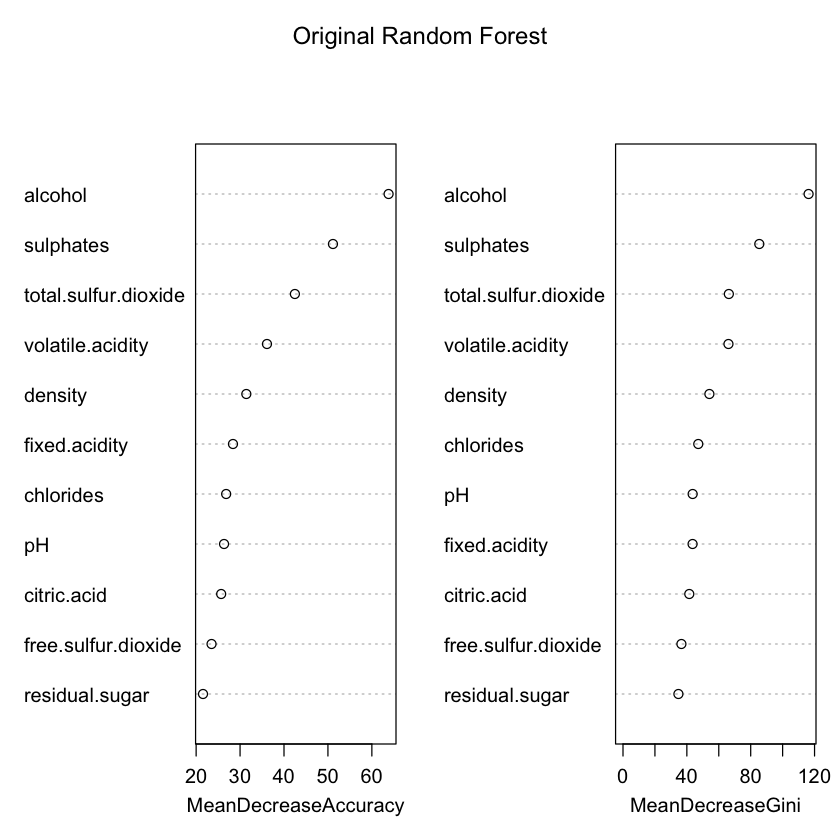

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 591   0
         1   0 688
                                     
               Accuracy : 1          
                 95% CI : (0.9971, 1)
    No Information Rate : 0.5379     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4621     
         Detection Rate : 0.4621     
   Detection Prevalence : 0.4621     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     
[1] "RF Original Train Error =  0"
Confusion Matrix and Statistics

          Reference
Pred

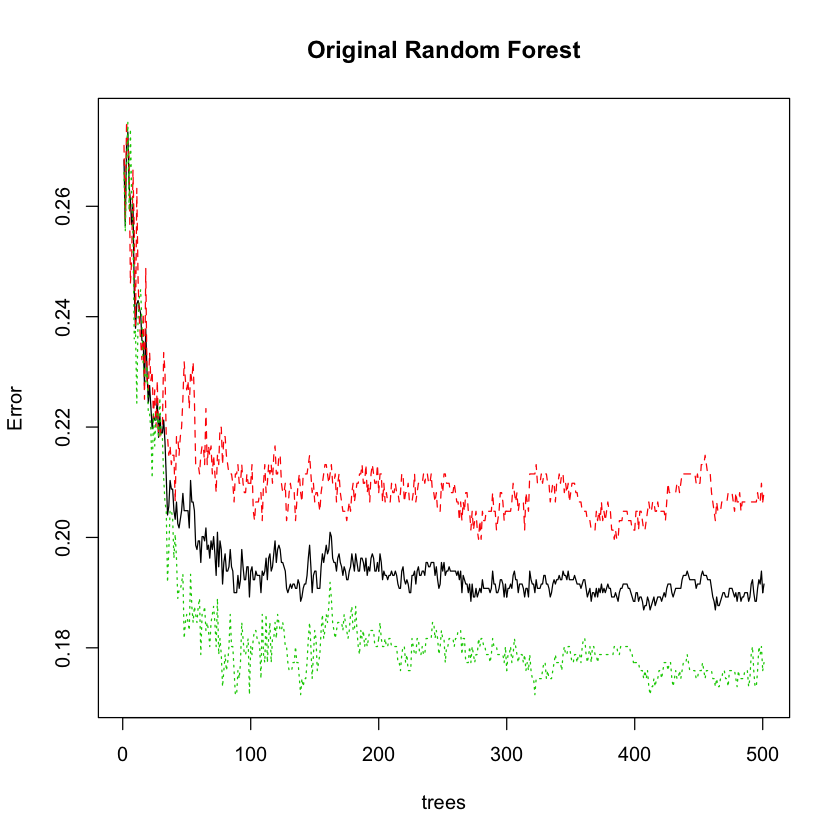

      mtry  OOBError
2.OOB    2 0.1876466
3.OOB    3 0.1907740
4.OOB    4 0.1845192
6.OOB    6 0.1876466
[1] "Best mtry =  4"

Call:
 randomForest(formula = quality ~ ., data = wine_train, importance = TRUE,      ntree = 1000, mtry = best.m, confusion = TRUE, err.rate = TRUE,      parms = list(split = "gini"), proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 18.84%
Confusion matrix:
    0   1 class.error
0 475 116   0.1962775
1 125 563   0.1816860


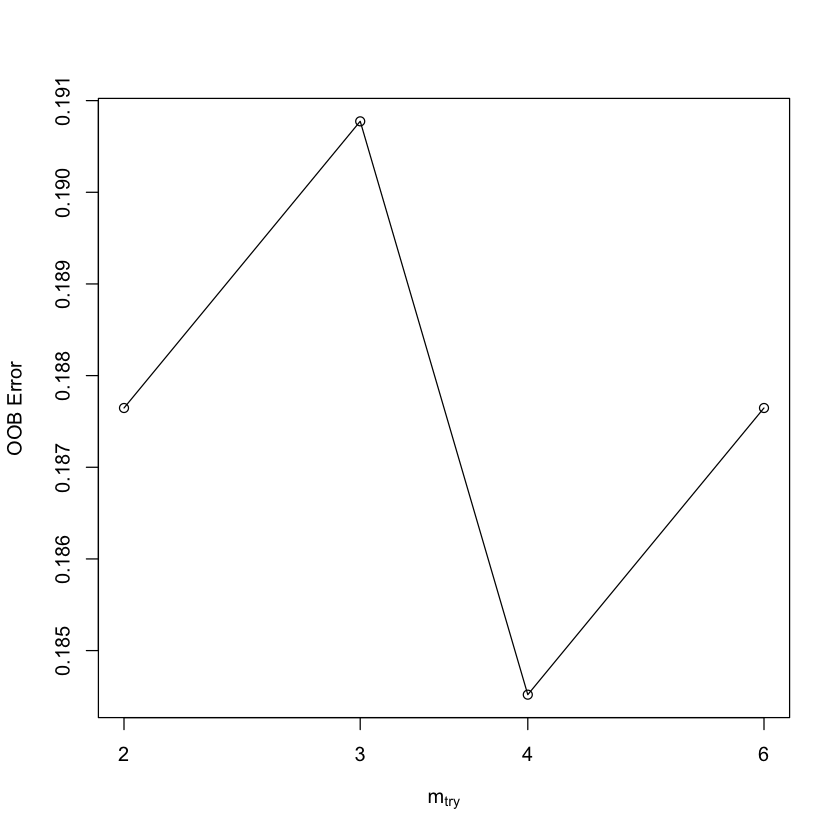

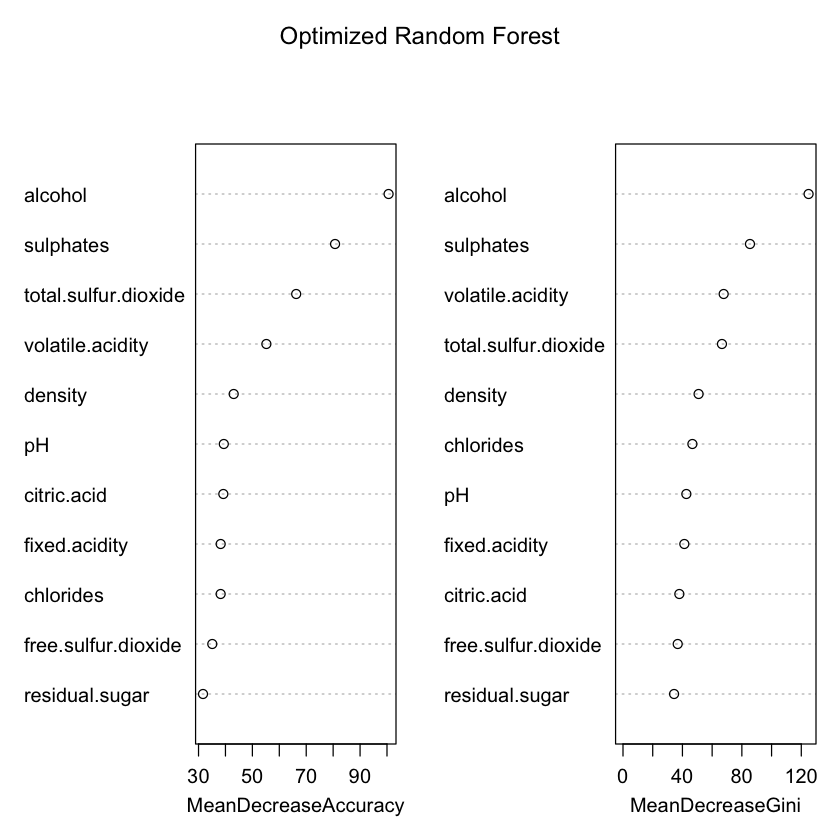

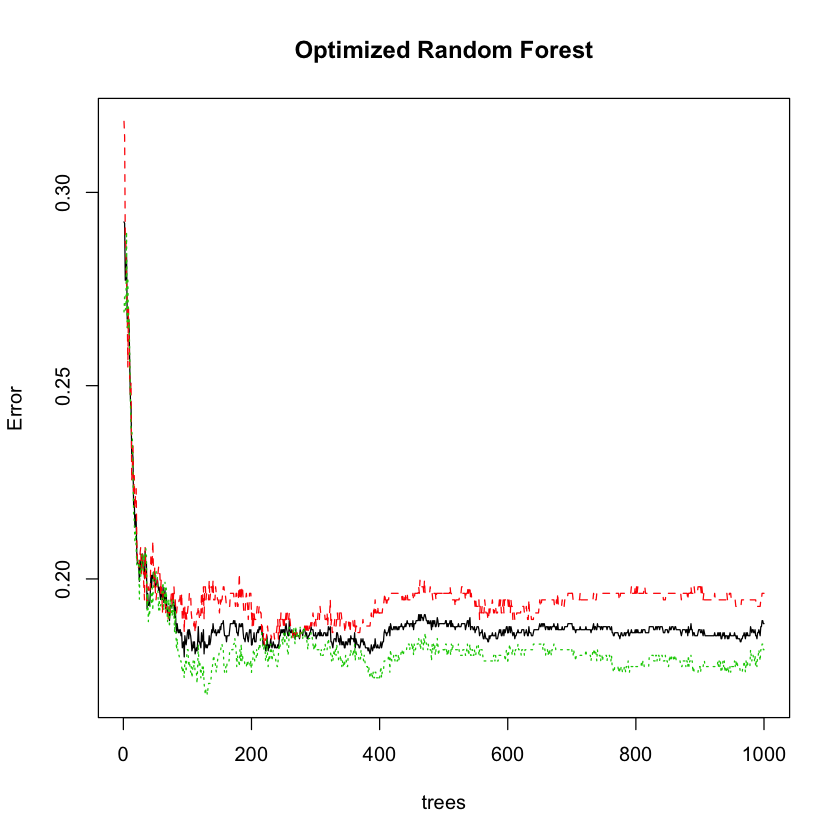

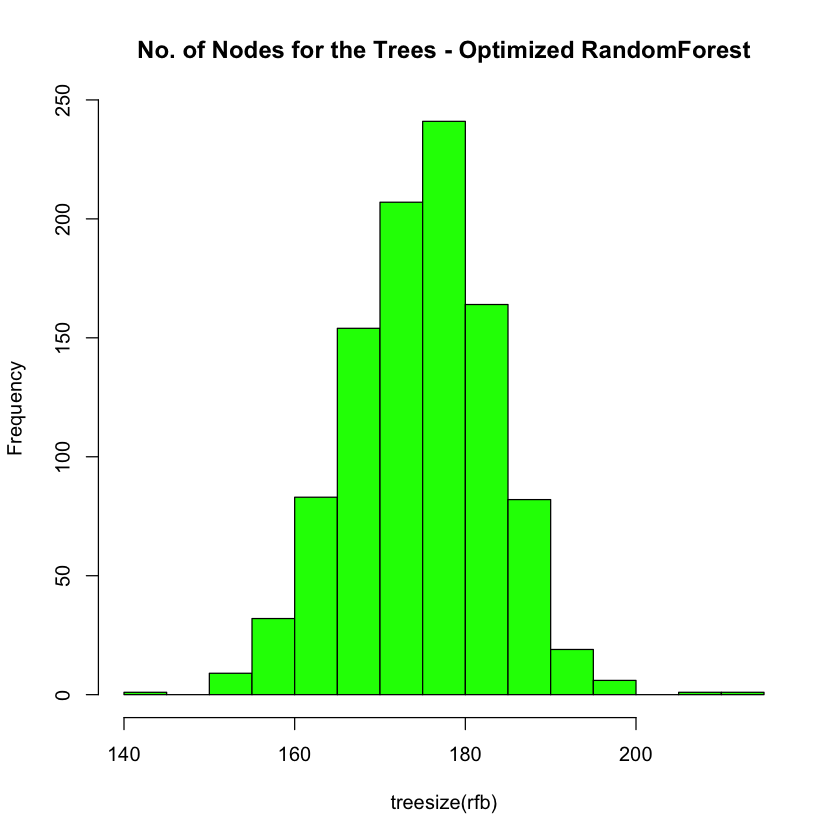

In [239]:
rf = randomForest(quality ~ ., 
                  data=wine_train, 
                  importance=TRUE, ntree=501, confusion=TRUE, err.rate=TRUE,
                  parms=list(split="gini"), proximity = TRUE) 
print(rf)
varImpPlot(rf, main = "Original Random Forest")
plot(rf, main = 'Original Random Forest')

rfortr <- predict(rf, newdata = wine_train, type = "class")
rforts <- predict(rf, newdata = wine_test, type = "class")

#Confusion Matrix
# Train
cmrftr <- confusionMatrix(as.factor(rfortr), wine_train$quality)
print(cmrftr)
accrftr <- cmrftr$overall["Accuracy"]
print(paste('RF Original Train Error = ', round(1 - accrftr['Accuracy'],4)))

# Test
cmrfts <- confusionMatrix(as.factor(rforts), wine_test$quality)
print(cmrfts)
accrfts <- cmrfts$overall["Accuracy"]
print(paste('RF Original Test Error = ', round(1 - accrfts['Accuracy'],4)))

#Optimization mtry
mtry <- tuneRF(wine_train[,1:11],wine_train$quality, ntreeTry=1000,
               stepFactor=1.5,improve=0.01, trace=TRUE, plot=TRUE)

best.m <- mtry[mtry[, 2] == min(mtry[, 2]), 1]
print(mtry)
print(paste('Best mtry = ', best.m))

rfb <-randomForest(quality ~ .,
                   data=wine_train, 
                   importance=TRUE, ntree=1000, mtry= best.m,
                   confusion=TRUE, err.rate=TRUE, parms=list(split="gini"), 
                   proximity = TRUE)
print(rfb)
varImpPlot(rfb, main = "Optimized Random Forest", sort = TRUE)

plot(rfb, main = 'Optimized Random Forest')

hist(treesize(rfb),
     main = "No. of Nodes for the Trees - Optimized RandomForest",
     col = "green")


In [240]:
#Optimized RF
rforoptr <- predict(rfb, newdata = wine_train, type = "class")
rforopts <- predict(rfb, newdata = wine_test, type = "class")

# Train
cmrfbtr <- confusionMatrix(as.factor(rforoptr), wine_train$quality)
print(cmrfbtr)
accrfbtr <- cmrfbtr$overall["Accuracy"]
print(paste('RF Optimized Train Error = ', round(1 - accrfbtr['Accuracy'],4)))


# Test
cmrfbts <- confusionMatrix(as.factor(rforopts), wine_test$quality)
print(cmrfbts)
accrfbts <- cmrfbts$overall["Accuracy"]
print(paste('RF Optimized Test Error = ', round(1 - accrfbts['Accuracy'],4)))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 591   0
         1   0 688
                                     
               Accuracy : 1          
                 95% CI : (0.9971, 1)
    No Information Rate : 0.5379     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4621     
         Detection Rate : 0.4621     
   Detection Prevalence : 0.4621     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     
[1] "RF Optimized Train Error =  0"
Confusion Matrix and Statistics

          Reference
Pre

In [241]:
control <- trainControl(method='repeatedcv', 
                        number=10, 
                        repeats=3,
                        search = 'random')

rf_random <- train(quality ~ .,
                   data = wine_train,
                   method = 'rf',
                   metric = 'Accuracy',
                   tuneLength  = 15, 

                   trControl = control)
print(rf_random)

Random Forest 

1279 samples
  11 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1151, 1151, 1152, 1152, 1151, 1151, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8118565  0.6214328
   3    0.8129084  0.6232891
   4    0.8082065  0.6141944
   5    0.8076897  0.6133518
   7    0.8045423  0.6068745
   8    0.8024609  0.6027724
   9    0.7990755  0.5959427
  10    0.7998628  0.5974136
  11    0.7972546  0.5920825

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.


In [242]:
importance(rfb)

0        1        MeanDecreaseAccuracy MeanDecreaseGini
fixed.acidity        24.10461 25.98612  38.22192             41.27700       
volatile.acidity     41.59765 37.36038  55.19513             67.75675       
citric.acid          21.57153 29.26068  39.20933             37.91156       
residual.sugar       21.86742 22.86744  31.66156             34.37798       
chlorides            26.88433 28.49879  38.21382             46.70035       
free.sulfur.dioxide  25.03795 23.57169  35.10620             36.81958       
total.sulfur.dioxide 43.92415 49.87926  66.27132             66.59793       
density              21.89864 36.57123  43.06206             50.87596       
pH                   26.05656 27.22022  39.38754             42.62617       
sulphates            56.37904 65.42843  80.70984             85.46315       
alcohol              74.67077 71.37169 100.58940            124.90778

# Decision Tree

Call:
rpart(formula = quality ~ ., data = wine_train, method = "class", 
    model = TRUE, parms = list(split = "gini"), xval = 10)
  n= 1279 

          CP nsplit rel error    xerror       xstd
1 0.35532995      0 1.0000000 1.0000000 0.03016930
2 0.01748449      1 0.6446701 0.6802030 0.02809248
3 0.01438240      8 0.5160745 0.6277496 0.02746042
4 0.01184433     12 0.4585448 0.6091371 0.02721362
5 0.01015228     13 0.4467005 0.6125212 0.02725939
6 0.01000000     14 0.4365482 0.6023689 0.02712084

Variable importance
             alcohol            sulphates     volatile.acidity 
                  28                   15                   13 
             density total.sulfur.dioxide            chlorides 
                  13                   11                    9 
         citric.acid  free.sulfur.dioxide        fixed.acidity 
                   6                    3                    2 
                  pH 
                   1 

Node number 1: 1279 observations,    complexity p

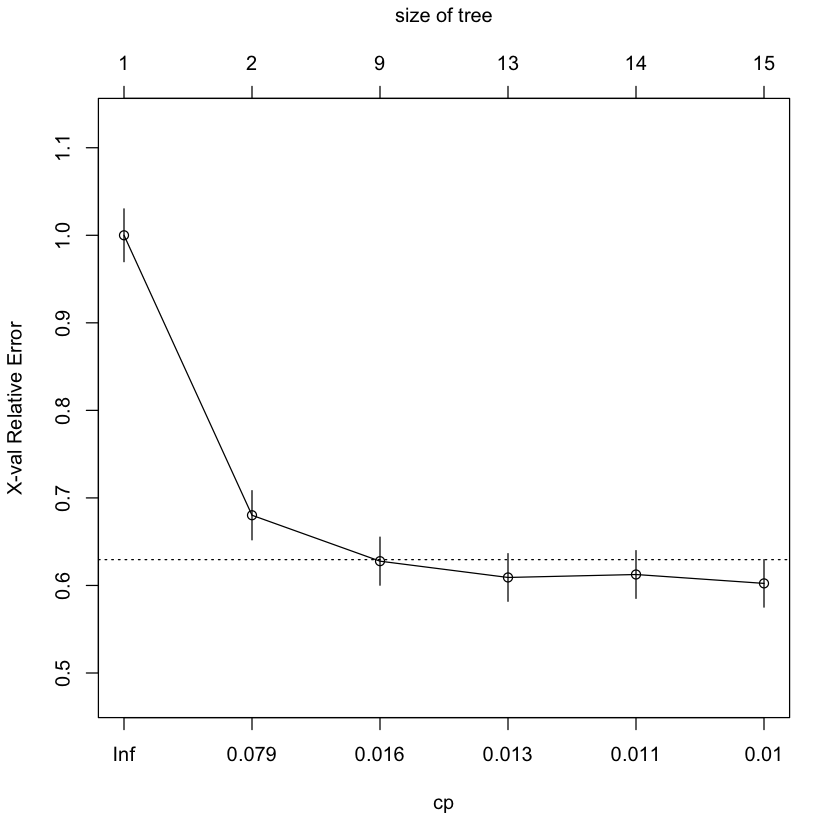

ERROR: Error in fancyRpartPlot(dtnp, uniform = TRUE, main = "Non-Pruned Classification Tree"): не могу найти функцию "fancyRpartPlot"


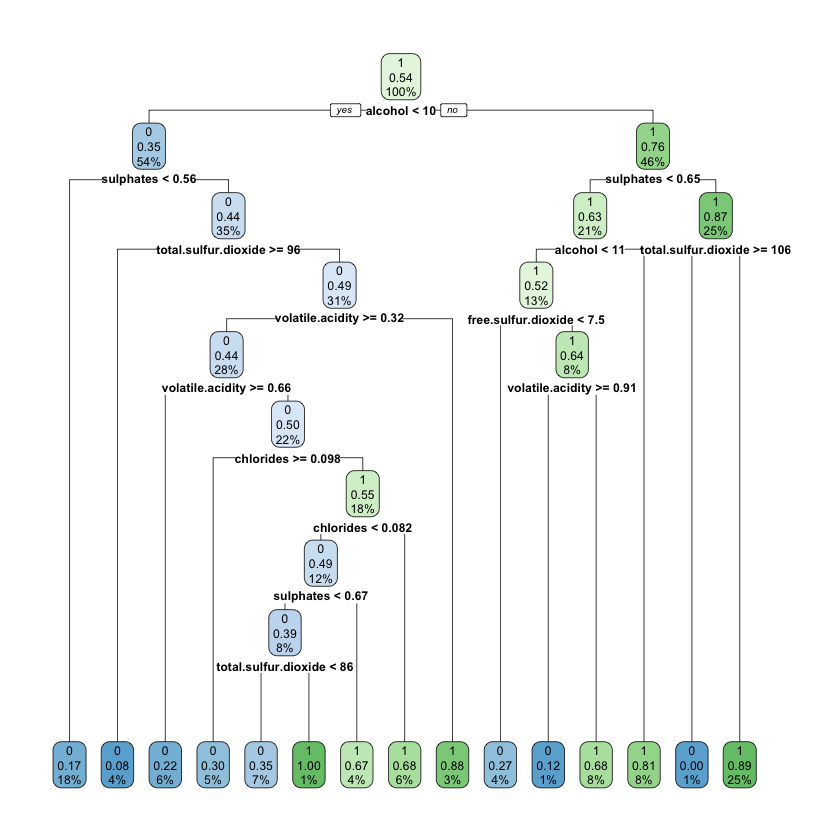

In [243]:

dtnp = rpart(quality ~ ., data=wine_train, 
             method = "class",
             model = TRUE, xval = 10, parms=list(split="gini")) 
print(summary(dtnp))

#Redistribution Error and R-squared
#Training
prednp <- predict(dtnp, newdata = wine_train, type = "class")
mcnp <- table(wine_train$quality, prednp)
err.resub <- round(1.0 - (mcnp[1,1] + mcnp[2,2])/sum(mcnp),3)

print("Non-pruned Tree without CV")
print(paste('Training Redistribution Error = ', err.resub))
printcp(dtnp)
plotcp(dtnp)

rpart.plot(dtnp, yesno = TRUE, extra = 106)
fancyRpartPlot(dtnp, uniform=TRUE, main="Non-Pruned Classification Tree")

#Confusion Matrix
cmdt <- confusionMatrix(as.factor(prednp), wine_train$quality)
accdt <- cmdt$overall["Accuracy"]
print(paste('LG CV Train Error = ', round(1 - accdt['Accuracy'],4)))


Cross validation before pruning

CART 

1279 samples
  11 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1150, 1151, 1151, 1151, 1152, 1151, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01438240  0.7208545  0.4375332
  0.01748449  0.7099128  0.4125247
  0.35532995  0.6162466  0.2031738

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0143824.


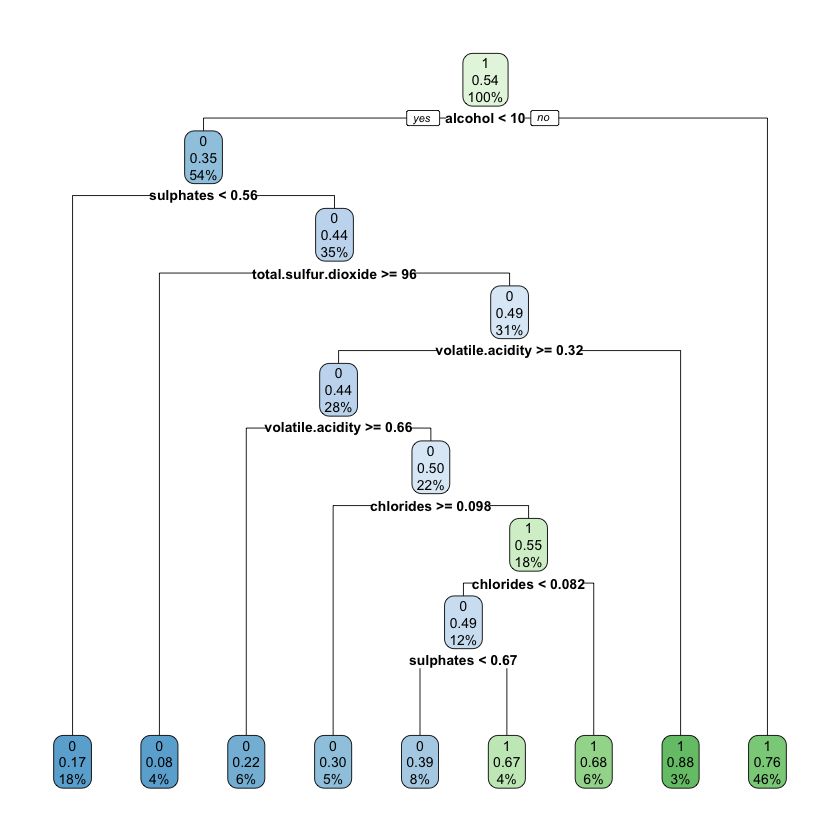

[1] "LG CV Test Error =  0.2312"


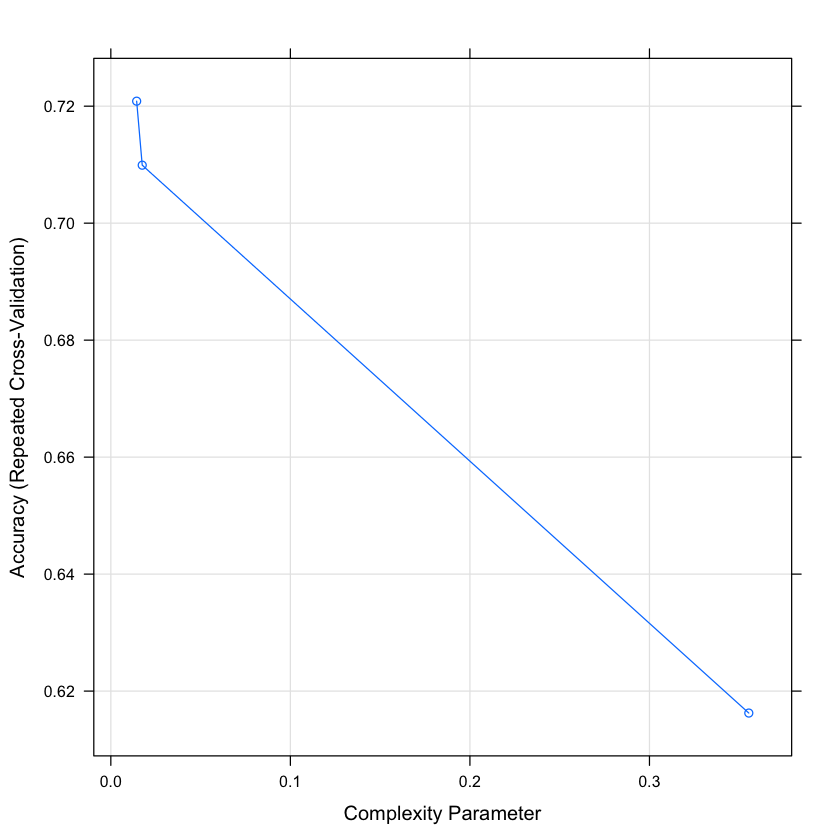

In [244]:

# specify parameters for cross validation
control <- trainControl(method = "repeatedcv", 
                        number = 10, # number of folds
                        repeats = 3, # repeat times
                        search = "grid")
dtcv <- train(quality ~ .,
                       data = wine_train,
                       method = "rpart",
                       trControl = control)
print.train(dtcv)

rpart.plot(dtcv$finalModel, extra = 106)
plot.train(dtcv)

# Test
pred_test <- predict(dtnp, newdata = wine_test, type = "class")

#Confusion Matrix
cmdt_test <- confusionMatrix(as.factor(pred_test), wine_test$quality)
accdtst <- cmdt_test$overall["Accuracy"]
print(paste('LG CV Test Error = ', round(1 - accdtst['Accuracy'],4)))


Pruning

[1] "Optimal cp =  0.01"
[1] "DT CV Test Error =  0.2312"
[1] "DT CV Train Error =  0.2017"


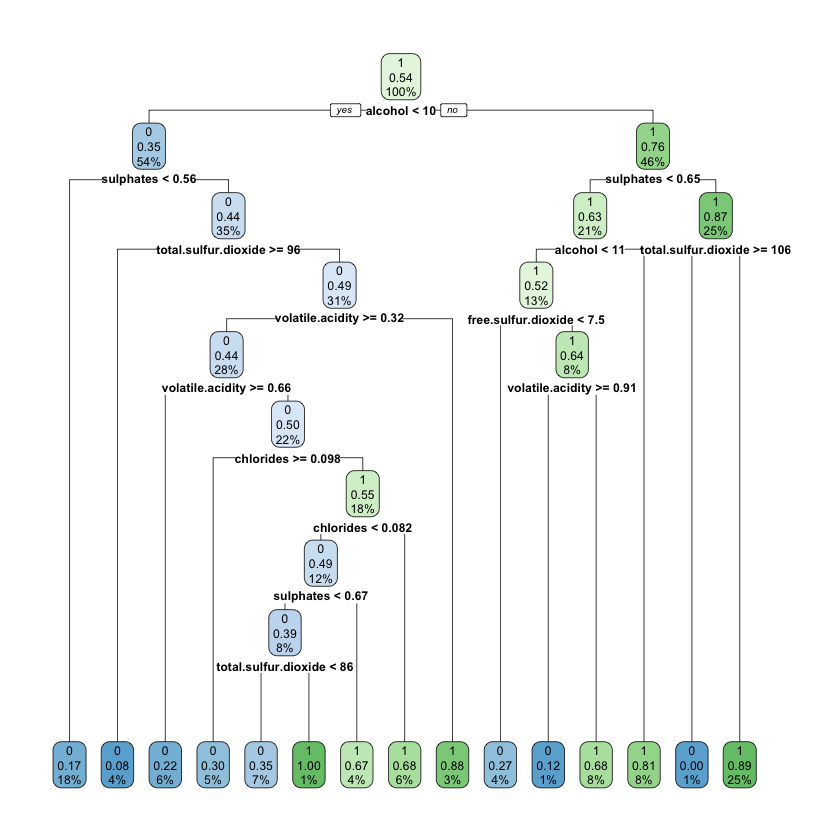

In [245]:

opt <- which.min(dtnp$cptable[, "xerror"]); 
cp1 <- dtnp$cptable[opt, "CP"];
print(paste('Optimal cp = ', cp1))
dtpr <- prune(dtnp,cp=cp1);

#fancyRpartPlot(dtpr, uniform=TRUE, main="Pruned Tree")
dtPrednp <- predict(dtpr, newdata = wine_train, type = "class") 

#Testing
predpr_test <- predict(dtpr, newdata = wine_test, type = "class")

#Confusion Matrix
#Testing
cmdtpr_test <- confusionMatrix(as.factor(predpr_test), wine_test$quality)
accdtstpr <- cmdtpr_test$overall["Accuracy"]
print(paste('DT CV Test Error = ', round(1 - accdtstpr['Accuracy'],4)))

#Confusion Matrix
#Training
cmdtpr <- confusionMatrix(as.factor(dtPrednp), wine_train$quality)
accdtpr <- cmdtpr$overall["Accuracy"]
print(paste('DT CV Train Error = ', round(1 - accdtpr['Accuracy'],4)))

rpart.plot(dtpr, yesno = TRUE)
#fancyRpartPlot(dtpr, uniform=TRUE, main="Pruned Classification Tree")

Implementation of Monte Carlos CV for: Logistic Regression, KNN, SVM, Ordinal Regression, Random Forest, Decision Tree¶

In [248]:
set.seed(7406)

testspl <- 0.2
n = dim(wine)[1]
n1 = round(n * testspl)
B= 100

b_index <- list()
te1 <- list()
te2 <- list()
te3 <- list()
te4 <- list()
te5 <- list()
te6 <- list()
te7 <- list()

for (b in 1:B) {
### randomly select n1 observations as a new training  subset in each loop
  flag <- sort(sample(1:n, n1))
    
  wine_train_temp <- wine[-flag,];  ## temp training set for CV
  wine_test_temp  <- wine[flag,]; ## temp testing set for CV
    
  b_index <- c(b_index, b)
     
    # Model 1: Logistic Regression with All Predictors
  lgall <- glm(quality ~ ., data = wine_train_temp, family = binomial(link="logit"))
  prediction <- predict(lgall,wine_test_temp[,1:11], type = "response")
  prediction <- ifelse(prediction >= .5, 1,0)
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(prediction))
  te1 <- c(te1,round(cm$overall[['Accuracy']],3))
    
    # Model 2: Logistic Regression with Significant Predictors
  lgselect <- glm(quality ~ .- residual.sugar - fixed.acidity - density - 
                  citric.acid - pH, 
                  data = wine, 
                  family = binomial(link="logit"))
  prediction <- predict(lgselect,wine_test_temp[,1:11], type = "response")
  prediction <- ifelse(prediction >= .5, 1,0)
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(prediction))
  te2 <- c(te2,round(cm$overall[['Accuracy']],3))
    
    # Model 3: Knn at k = kknb
  knn <- knn(train=wine_train_temp, test=wine_test_temp, 
             cl=wine_train_temp$quality, k= kknb)
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(knn))
  te3 <- c(te3,round(cm$overall[['Accuracy']],3))
    
    # Model 4: SVM C = cr_best
  classifier = svm(formula = quality ~ .,data = wine_train_temp,type = 
                     'C-classification', cost = cr_best, kernel = 'radial')
  predictions <- predict(classifier, newdata = wine_test_temp[,1:11])
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(predictions))
  te4 <- c(te4,round(cm$overall[['Accuracy']],3))

    # Model 5: Random Forest - mtry
  rf <- randomForest(quality~., data=wine_train_temp, proximity=TRUE, mtry = best.m) 
  predictions <- predict(rf, wine_test_temp)
  cm <- confusionMatrix(predictions, wine_test_temp$quality)
  te5 <- c(te5,round(cm$overall[['Accuracy']],3))
    
    # Model 6: Decision Tree - cp
  fit <- rpart(quality~., data = wine_train_temp, method = 'class')
  dtpr <- prune(fit,cp = cp1)
  
  predictions <- predict(dtpr, wine_test_temp, type = 'class')
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(predictions))
  te6 <- c(te6,round(cm$overall[['Accuracy']],3))

  
}

TEALL <- data.frame(unlist(te1), unlist(te2), unlist(te3), unlist(te4), 
                    unlist(te5), unlist(te6))

colnames(TEALL) <- c("LogReg", "LogRegSelect", "Knn", "Svm", "RF", "DTree")

results_viz = data.frame(unlist(apply(TEALL, 2, mean)))
results_viz


[1] 1279


unlist.apply.TEALL..2..mean..
LogReg       0.74386                      
LogRegSelect 0.75093                      
Knn          0.74240                      
Svm          0.76293                      
RF           0.81829                      
DTree        0.72378

BOOSTING

All variables

[1] 1158

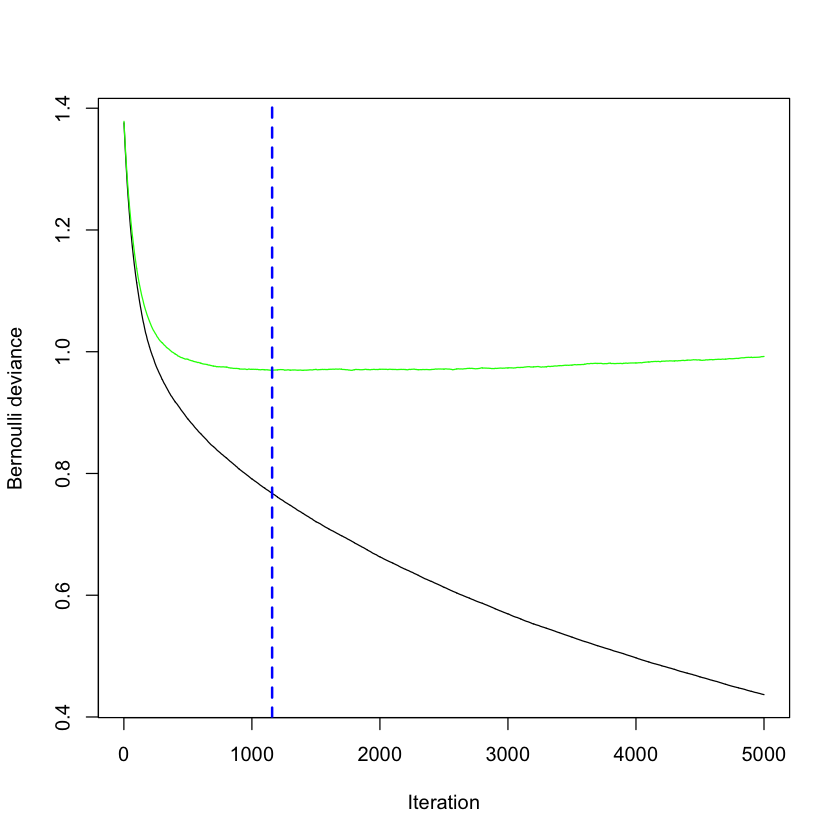

In [250]:
# Boosting

#wine <- rbind(white, red)
wine <- red
#wine.pr <- wine[1:11]

#wine <- read.csv(file = "winequality_red.csv", head = TRUE, sep=";")
wine$quality <- ifelse(wine$quality >= 6, 1,0)

#Random sampling
set.seed(7406)

test <- 0.2
ntr <- floor((1 - test)*nobs)
ind <- sample(nobs, ntr, replace = FALSE)

# Training and Test datasets
wine_train <- wine[ind,]
wine_test <- wine[-ind,]

gbm.train <- gbm(quality ~ .,
                 data=wine_train,
                 distribution = 'bernoulli',
                 n.trees = 5000, 
                 shrinkage = 0.01, 
                 interaction.depth = 3,
                 cv.folds = 10,
                 n.cores = NULL,verbose = FALSE)
                  
## Model Inspection 
## Find the estimated optimal number of iterations
perf_gbm1 = gbm.perf(gbm.train, method="cv") 
perf_gbm1

var                  rel.inf  
alcohol              alcohol              21.333341
sulphates            sulphates            12.085509
volatile.acidity     volatile.acidity     10.809623
total.sulfur.dioxide total.sulfur.dioxide 10.770103
chlorides            chlorides             8.067754
pH                   pH                    7.640739
density              density               7.426342
citric.acid          citric.acid           6.008742
fixed.acidity        fixed.acidity         6.006107
free.sulfur.dioxide  free.sulfur.dioxide   5.052543
residual.sugar       residual.sugar        4.799197

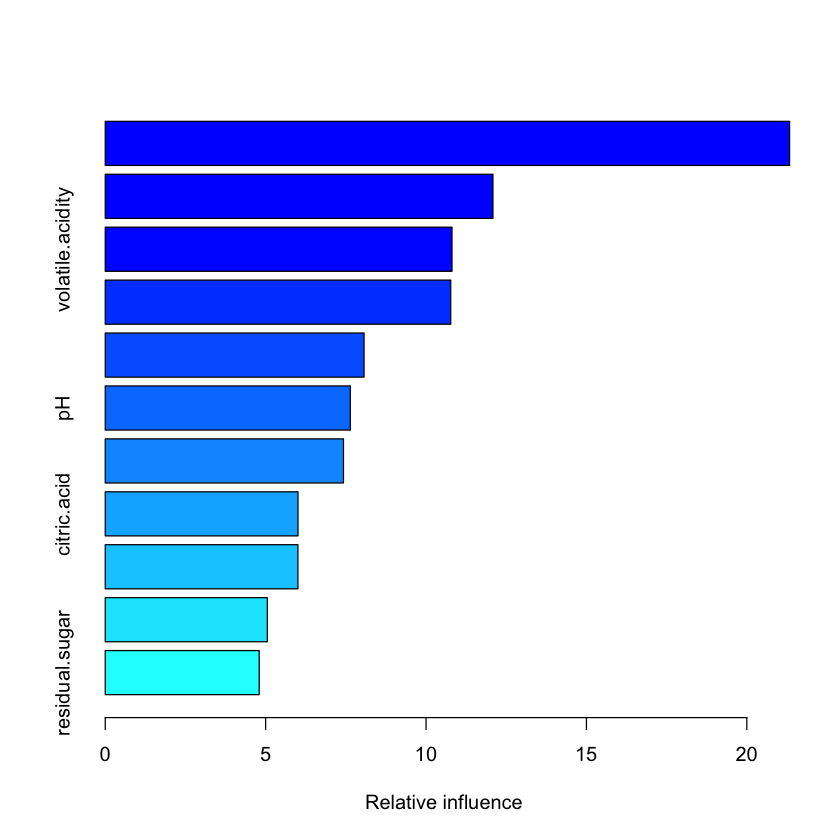

In [251]:
summary(gbm.train)

In [252]:
## Training error
pred1gbm <- predict(gbm.train,newdata = wine_train, n.trees=perf_gbm1, type="response")

y1hat <- ifelse(pred1gbm < 0.5, 0, 1)

bst_train_err <- round(mean(y1hat != wine_train$quality),4)
print(paste('Boost Training Accuracy = ', 1 - bst_train_err))

## Testing Error
y2hat <- ifelse(predict(gbm.train,newdata = wine_test, n.trees=perf_gbm1, type="response") < 0.5, 0, 1)
bst_test_err <- round(mean(y2hat != wine_test$quality),4)
print(paste('Boost Testing Accuracy = ', 1 - bst_test_err))



[1] "Boost Training Accuracy =  0.8335"
[1] "Boost Testing Accuracy =  0.7688"


Only SIGNIFICANT variables

[1] 1589

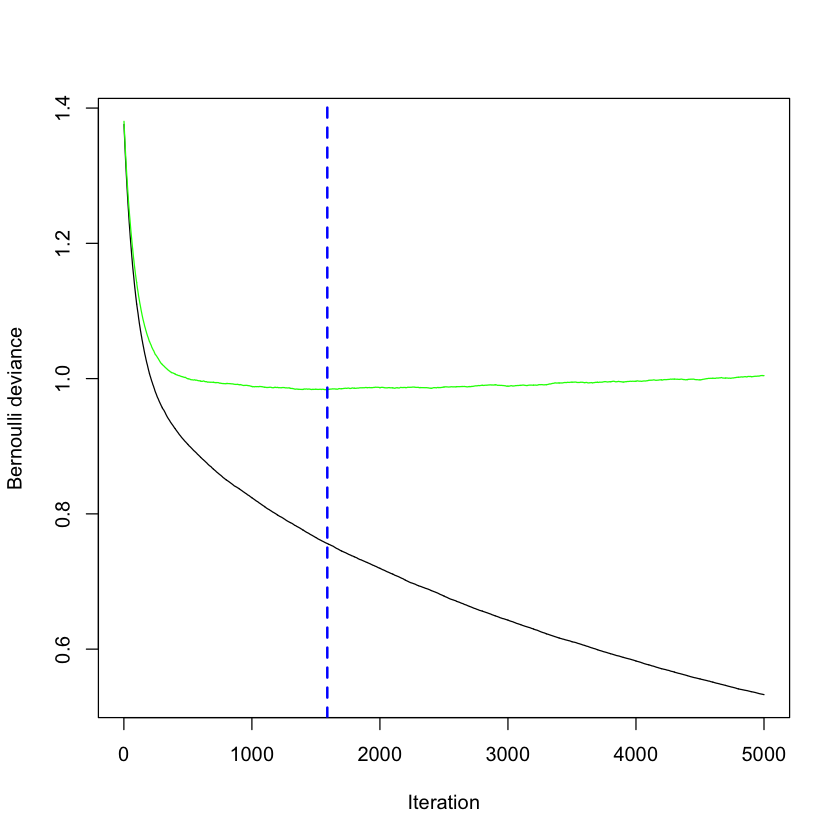

In [253]:
gbm.sig <- gbm(quality ~ . - residual.sugar - fixed.acidity - density - citric.acid - pH,
                 data=wine_train,
                 distribution = 'bernoulli',
                 n.trees = 5000, 
                 shrinkage = 0.01, 
                 interaction.depth = 3,
                 cv.folds = 10,
                 n.cores = NULL,verbose = FALSE)
                  
## Model Inspection 
## Find the estimated optimal number of iterations
perf_gbm2 = gbm.perf(gbm.sig, method="cv") 
perf_gbm2

In [254]:
## Training error
pred11gbm <- predict(gbm.sig,newdata = wine_train, n.trees=perf_gbm2, type="response")

y11hat <- ifelse(pred11gbm < 0.5, 0, 1)

bst1_train_err <- round(mean(y11hat != wine_train$quality),4)
print(paste('Boost Training Accuracy = ', 1 - bst1_train_err))

## Testing Error
y22hat <- ifelse(predict(gbm.sig,newdata = wine_test, n.trees=perf_gbm2, type="response") < 0.5, 0, 1)
bst2_test_err <- round(mean(y22hat != wine_test$quality),4)
print(paste('Boost Testing Accuracy = ', 1 - bst2_test_err))



[1] "Boost Training Accuracy =  0.8319"
[1] "Boost Testing Accuracy =  0.7656"


In [255]:
dim(wine_test_temp)[1]/dim(wine_train_temp)[1]

[1] 0.2501955

In [256]:
dim(wine_test_temp)

[1] 320  12

In [257]:
dim(wine_train_temp)

[1] 1279   12